# Сборный проект -1

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файла и изучение общей информации

In [2]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#сохранение данных из файла в датафрейм data
data_row = pd.read_csv('/datasets/games.csv')

In [3]:
data = data_row.copy()

In [4]:
#функция для вывода основных методов при исследовании данных
def data_research(df):
    print('Вывод первых 10 строк датафрейма')
    print('')
    display(df.tail(10))
    print('')
    print('Описание данных методом describe()')
    print('')
    display(df.describe().T)
    print('')
    print('Описание данных методом info()')
    print('')
    display(df.info())
    print('')
    print('Количество дубликатов')
    print('')
    print(df.duplicated().sum())
    print('')
    print('Общая гистограмма для всех числовых столбцов таблицы')
    print('')
    df.hist(bins=50, figsize=(15, 20))

Вывод первых 10 строк датафрейма



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN



Описание данных методом describe()



,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00



Описание данных методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None


Количество дубликатов

0

Общая гистограмма для всех числовых столбцов таблицы



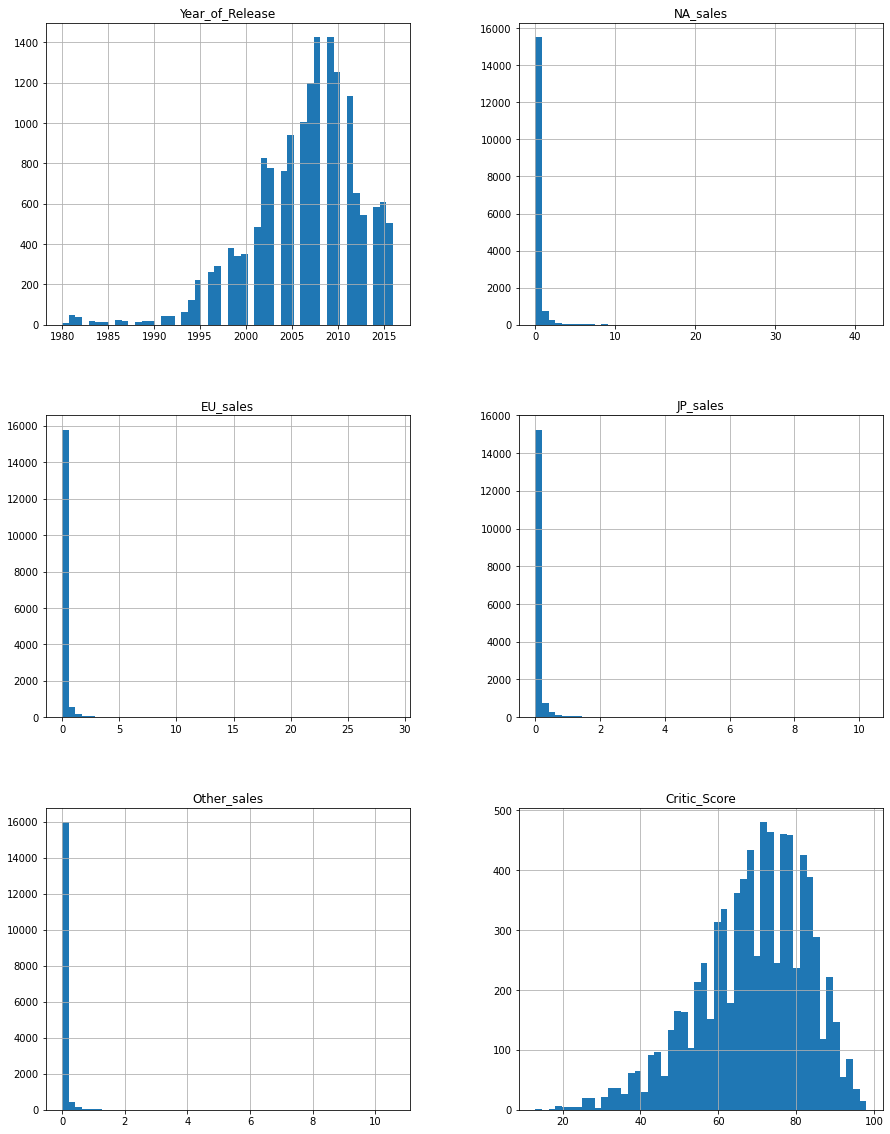

In [5]:
#вызов функции для описания данных
pd.set_option('display.max_columns', None)
data_research(data)

<div style="border:solid blue 2px; padding: 20 px">
    
По количеству заполненных строк можно увидеть, что в столбцах ` Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` присутствуют пропуски. 

</div>

<div style="border:solid blue 2px; padding: 20 px">
Все названия столбцов запишем в едином "змеином" стиле в нижнем регистре, например, столбец "Year_of_Release ", будет записан как "year_of_release".
</div>


<div style="border:solid green 2px; padding: 20 px">

В столбцах `Name` и `Genre` имеются по два пропуска, изучим эти строки далее, и при невозможности заполнить недостающие данные, исключим строки из исследования.

Столбец `User_Score` имеет строковый тип данных, хотя пользовательская оценка должна лежать в интервале от 0 до 10, изучим данный столбец тщательнее.
    
Изменим тип данных в столбцах `Year_of_Release`, `Critic_Score` на целочисленный тип данных, так как год и оценку критика не принято представлять в виде десятичных дробей.
    
В столбце `Rating` и `Platform` необходимо проверить наличие неявных дубликатов.
    
По гистограмме года выпуска игр видно, что пик выпуска приходится на 2007-2009 год, после заметна тенденция к снижению количества выпускаемых игр. Столбец имеет пропуски, заполнить средним и медианным год релиза нельзя, поэтому заменим пропуски на "0" (при исследовании данных будем исключать данные строки).

Данные в оставшихся столбцах выглядят реально.

</div>

## Предобработка данных

### Переименование столбцов

In [6]:
#приведем к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [8]:
#вывод строк без года релиза
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
#рассчитаем процент пропусков в каждом столбце
data.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Пропуски в столбце `year_of_release` заменим на "0", заполнить год релиза игр ни медианным, ни средним значением мы не можем - это ошибочное решение. Так как пропуски составляют 1.6%, не будем пытаться найти данные в интернете.

In [10]:
#в столбце "year_of_release" заменим пропуски на 0
data['year_of_release'] = data['year_of_release'].fillna(0)

Пропуски в столбце `critic_score` и `user_score` заменим на "-1". Заполнять данные средним значением будет ошибочно, так как можно сильно промахнуть и  создать аномалии.

In [11]:
#в столбце "critic_score" и "user_score" заменим пропуски на -1
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [12]:
#проверим строки без названия и жанра
data[(data['name'].isna())& (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,NaN


In [13]:
#так как таких строк всего 2 и они не несут никакой информации, то удалим их 
data.drop(data[(data['name'].isna()) & (data['genre'].isna())].index, inplace=True)

In [14]:
#проверим столбец "user_score", в котором присутсвуют строковые значения
data[data['user_score']=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Значение в столбце `user_score` "tbd" расшифровывается,как To Be Determined, то есть "будет определено". Так как рейтинг будет определен позже, а для работы со столбцом необходим тип float, то заменим "tbd" на "-1"(как и пропуски в этом столбце).

In [15]:
data.loc[data['user_score']=="tbd",'user_score'] = -1

In [16]:
#проверка замены
data[data['user_score']==-1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


Пропуски в столбце `rating` заменим на заглушку "unknown", чтобы в дальнейшем иметь возможность отобразить данные на графиках (например, продажи по регионам игр разичного возрастного рейтинга).

In [17]:
#пропуски в стоблце "rating" заменим на заглушку "unknown"
data['rating'] = data['rating'].fillna('unknown')

### Преобразование типов данных

In [18]:
#изменим тип данных столбцов "year_of_release" и "critic_score" на целочисленный, а столбец "user_score" дробный
data = data.astype({"year_of_release": "int", "critic_score": "int", "user_score": "float"})

In [19]:
#проверка типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Проверка на неявные дубликаты

In [20]:
#выведем уникальные названия platform
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [21]:
#выведем уникальные названия rating
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown'],
      dtype=object)

In [22]:
data['rating'].value_counts()

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [23]:
#выведем уникальные названия genre
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [24]:
#приведем все названия игр к нижнему регистру и удалим дубликаты
data['name_lower'] = data['name'].str.lower()
data_col = list(data.columns)
data.drop_duplicates(subset = data_col.remove('name'))
#удалим столбец name_lower
data = data.drop('name_lower', axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Cуммарные продажи игр во всех регионах

In [26]:
#суммарные продажи для каждой игры по всем регионам добавим в новый столбец "all_sales"
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
#проверим количество обрасываемых данных
data.shape[0] / data_row.shape[0]

0.9998803469937182

<div style="border:solid green 2px; padding: 20 px">

**Вывод**
    
В данном разделе были обработаны пропуски в столбцах 
- `name` (удалены строки, где название игры отсутствует);
- `genre` (удалены строки, где название игры отсутствует);
- `year_of_release` пустые строки заменены на "0", так как заполнить недостающие данные нельзя средним значением;
- `critic_score` и `user_score` пустые строки заменены на "-1", аналогично ошибочно заполнять средним отсутсвующие данные, так создадим аномалии;
- столбец `user_score` исследован подробнее, аббревиатура "tbd" (рейтинг, который будет определен позже) заменено на "-1", чтобы тип данных с "object" изменить на "float";
- `rating` пустые строки заменены на заглушку "unknown", чтобыв дальнейшем строить графики, используя категории возрастного рейтинга.

Пропуски в столбцах `critic_score` и `user_score` могли возникнуть из-за отсутсвия в исходной базе данных, либо человеческий фактор - ошибка при выгрузке. 
    
Пропуски в столбце `year_of_release`, скорее всего, вызваны человеческим фактором, так как у каждой выпущенной игры есть год релиза.
    
Пропуски в столбце `rating` ,вероятно, обусловлены отсуствием рейтинга для данных игр в исходной базе.
    
Изменены типы данных в столбцах на целочисленный тип:    
- `year_of_release`;
- `critic_score`.
    
Изменены типы данных в столбцах на числа с плавающей запятой:
- `user_score`.
    
Датафрейм очищен от явных дубликатов, а также проверены неявные в столбцах `platform`, `rating`, `genre`.
    
Добавлен новый столбец `all_sales`, содержащий сумму продаж по всем регионам.
    
В результате обработки пропусков и дубликатов было отброшено меньше 1% данных, что не превышает требуемые 10%.
</div>

## Исследовательский анализ данных

In [28]:
#группируем релиз игр по годам
sales_by_year = data[data['year_of_release']>0].pivot_table(index='year_of_release', values='name', aggfunc='count')
sales_by_year['year_of_release'] = sales_by_year.index

[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Количество релизов игр')]

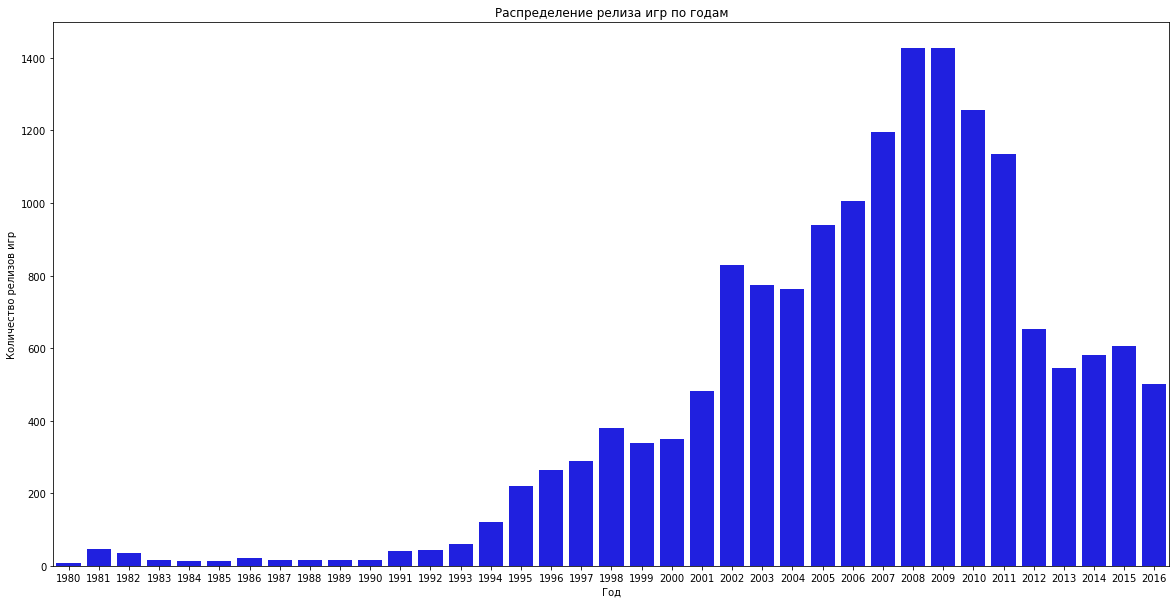

In [29]:
#столбчатая диаграмма для количества выпущенных игр по годам
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='year_of_release',
            y='name',
            data=sales_by_year,
            palette=['blue'])

ax.set_title('Распределение релиза игр по годам')
ax.set(xlabel='Год', ylabel='Количество релизов игр')

<div style="border:solid blue 2px; padding: 20 px">
По диаграмме видно, что до 2000-х игры выпускались в значительно меньших количествах, чем после. Наибольшее количество релизов наблюдается в 2008-2009. После 2009 года наблюдается уменьшение количества релизов в год. Данные до 2012 года для построения прогноза на 2017 год лучше отбросить, потому что сначала шло развитие игровой индустрии и соответственно увеличение релизов каждый год, после пика в 2008-2009 количество выпускаемых игр пошло на снижение вплоть до 2016 года.
</div>

In [30]:
#группируем продажи по платформам, выбираем топ-5 платформ по суммарным продажам
sales_by_platform = data.pivot_table(index='platform', values='all_sales', aggfunc='sum')
sales_by_platform['platform'] = sales_by_platform.index
sales_by_platform = sales_by_platform.sort_values(by='all_sales', ascending=False)

[Text(0.5, 0, 'Платформа'),
 Text(0, 0.5, 'Суммарные продажи, миллион проданных копий')]

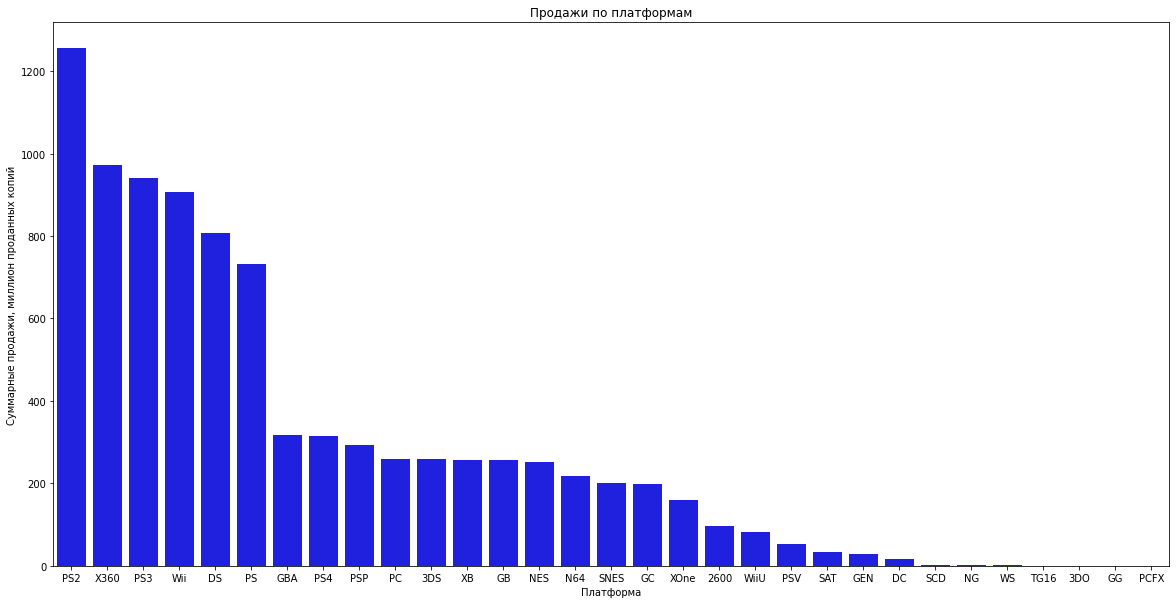

In [31]:
#диаграмма для топ-5 платформ по объемам продаж
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='platform',
            y='all_sales',
            data=sales_by_platform,
            palette=['blue'])

ax.set_title('Продажи по платформам')
ax.set(xlabel='Платформа', ylabel='Суммарные продажи, миллион проданных копий')

Максимальное количество суммарных продаж наблюдается у платформы "PS2". В пятерку лидеров также вошли "X360", "PS3", "Wii", "DS".

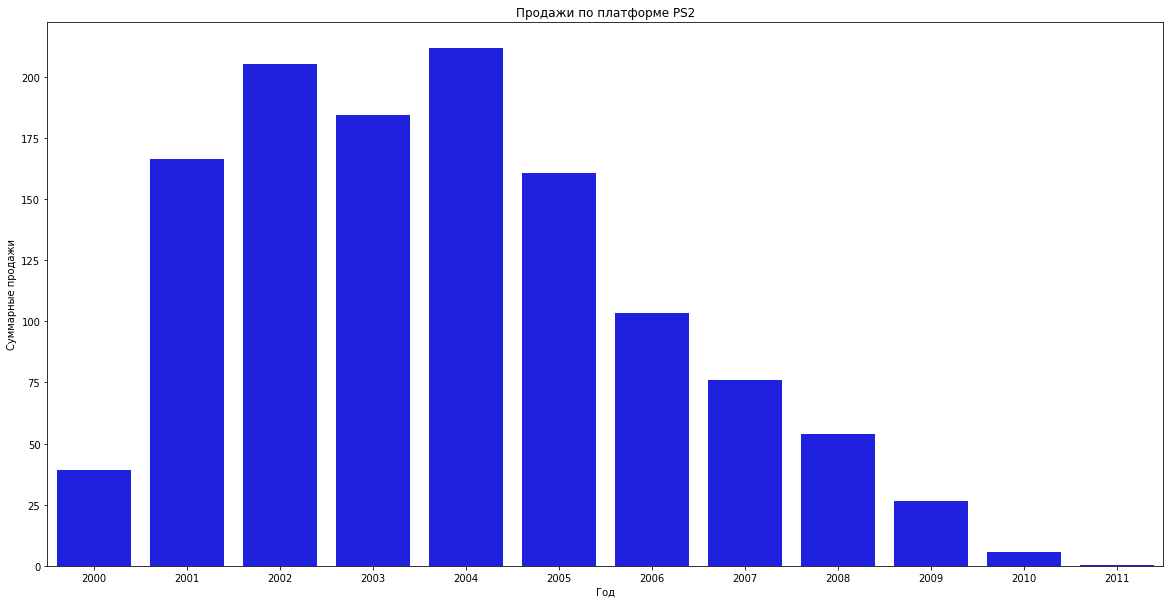

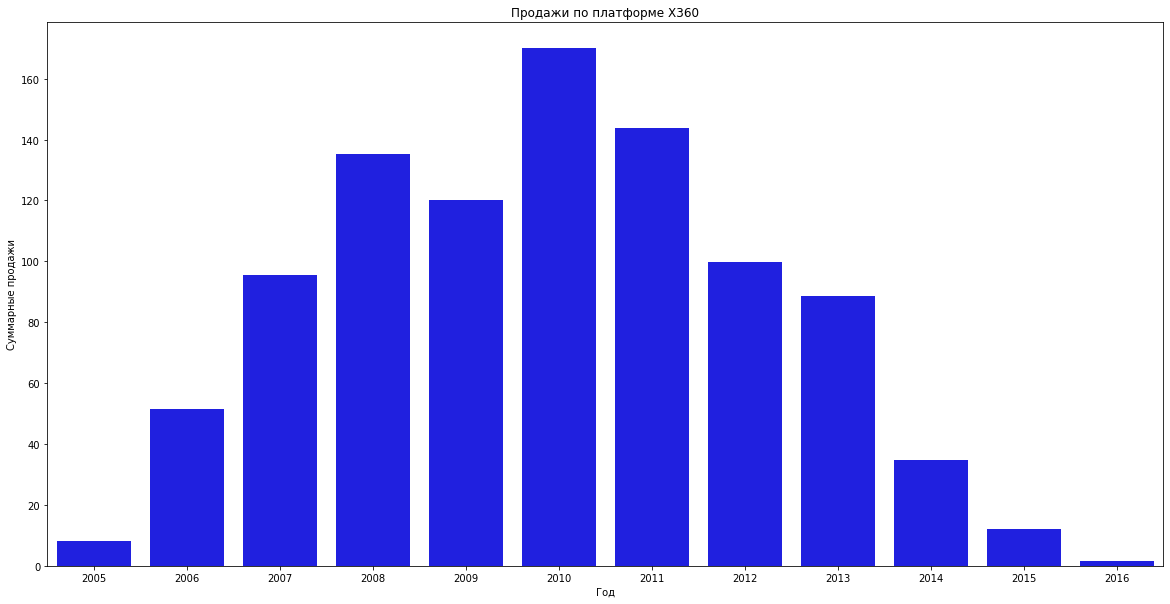

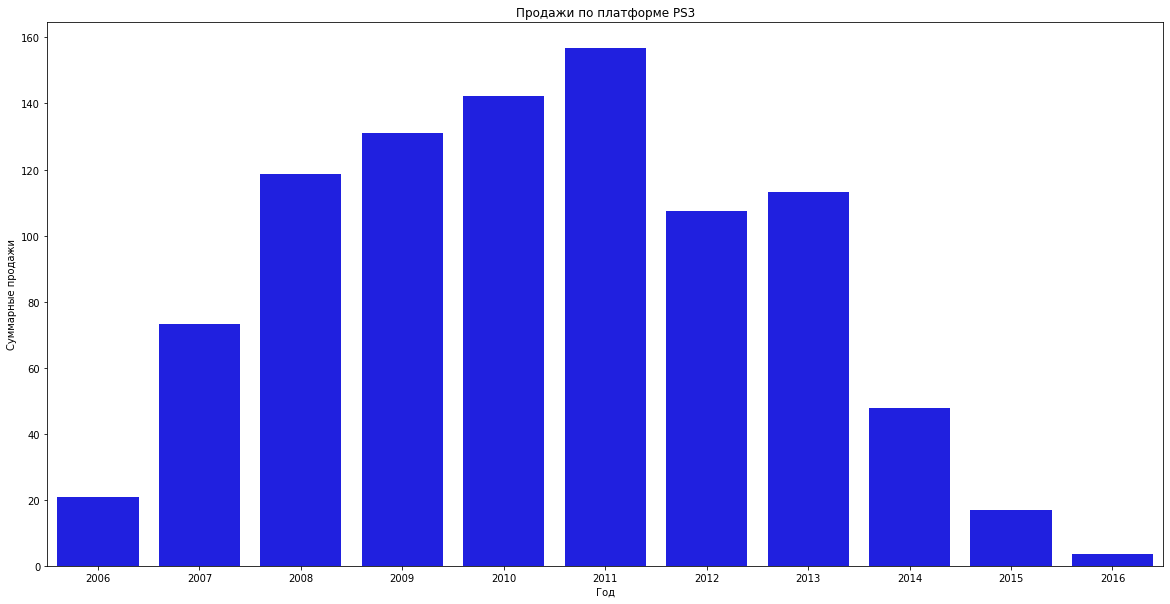

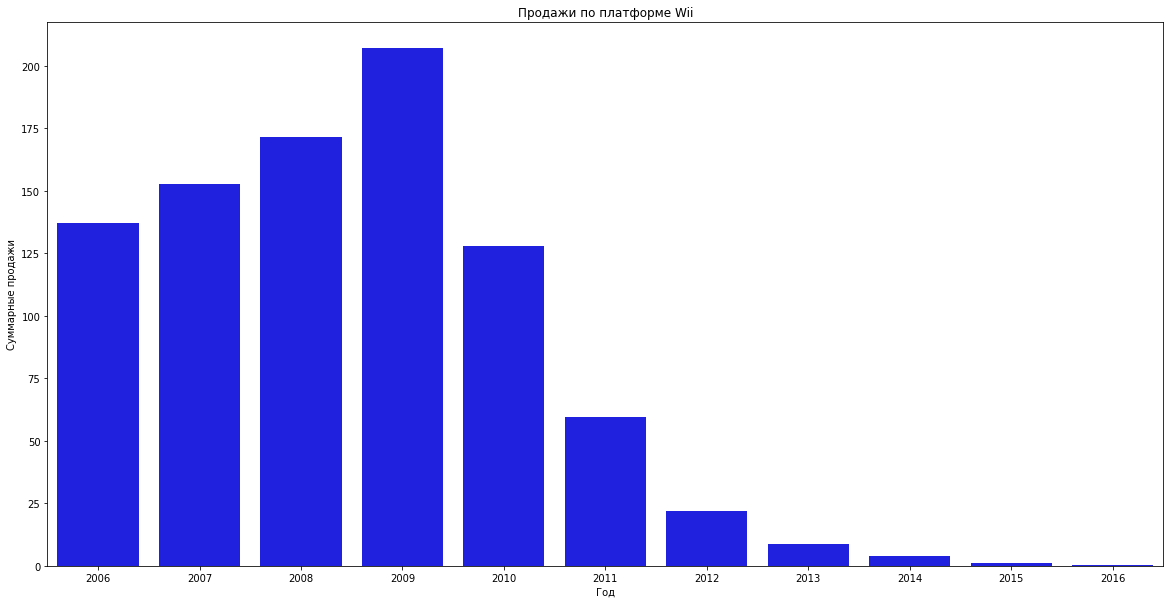

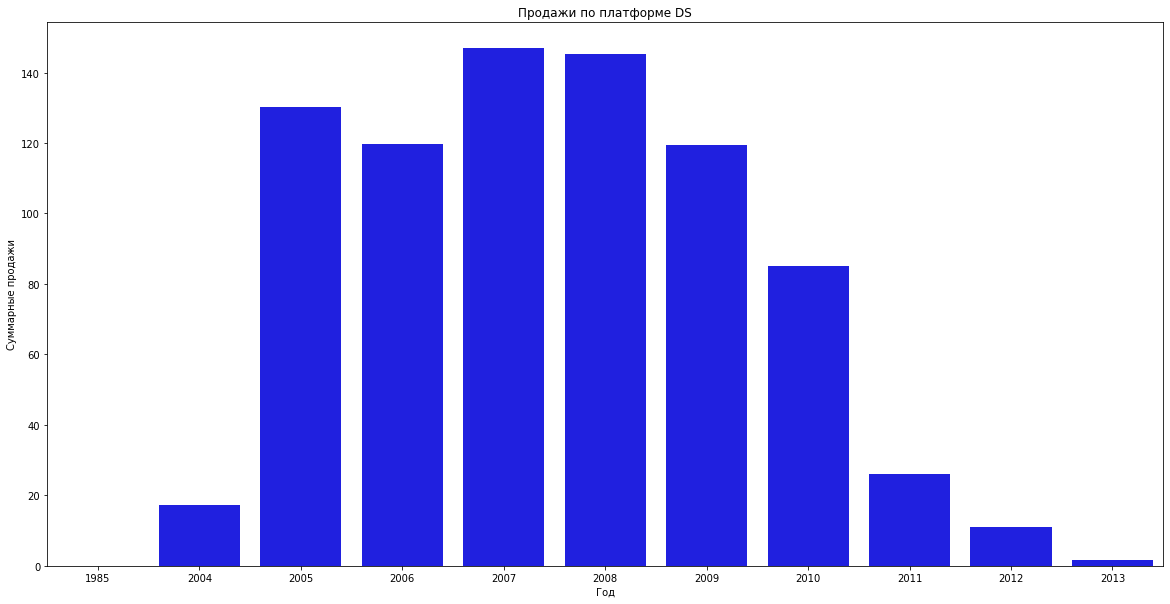

In [32]:
#группируем продажи по топ-5 платформам и годам
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for i in top_platform:
    sales_by_platform = data[(data['platform']==i) & (data['year_of_release']>0)].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    sales_by_platform['year_of_release'] = sales_by_platform.index
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x='year_of_release', y='all_sales', data=sales_by_platform,palette=['blue'])
    ax.set_title(f'Продажи по платформe {i}')
    ax.set(xlabel='Год', ylabel='Суммарные продажи')

<div style="border:solid blue 2px; padding: 20 px">
По диаграммам продаж ТОП-5 платформ "PS2", "X360", "PS3", "Wii", "DS" можно представить следующий жизненный цикл платформ:
- достаточно резкое развитие платформы в течение 2-4 лет;
- выход на стационарный режим ~ 2 года;
- резкий спад в объемах продаж в последующие года до околонулевых значений.

Таким образом, новые платформы формируются 2-4 года, исчезают платфомы примерно за 4 года.
</div>

<div class="alert alert-info"> 
    
Для построения прогноза на 2017 год будем использовать данные за 2014-2016 года. 
Актуальный период выбран исходя из следующих факторов:
- с 1980 до 2012 года происходил процесс развития рынка игр (количество релизов игр дошло до пика в 2008-2009 году и далее пошел резкий спад), поэтому использовать данные 20-летней давно некорректно;
-  в среднем новые платформы появляются за 2-4 года, а старые исчезают за 4, то есть игровая индустрия имеет динамично меняющийся рынок, следовательно, брать данные более чем за 2-3 предшествующих года - ошибочное решение.

</div>

In [33]:
#возьмем данные за соответвующий актуальный период с 2014-2016г.
data = data[data['year_of_release']>=2014]
data.shape[0]

1689

In [34]:
#группируем продажи по платформам, выбираем топ-10 платформ по суммарным продажам
sales_by_platform = data.pivot_table(index='platform', values='all_sales', aggfunc='sum')
sales_by_platform['platform'] = sales_by_platform.index
sales_by_platform = sales_by_platform.sort_values(by='all_sales', ascending=False)

[Text(0.5, 0, 'Платформа'),
 Text(0, 0.5, 'Суммарные продажи, миллион проданных копий')]

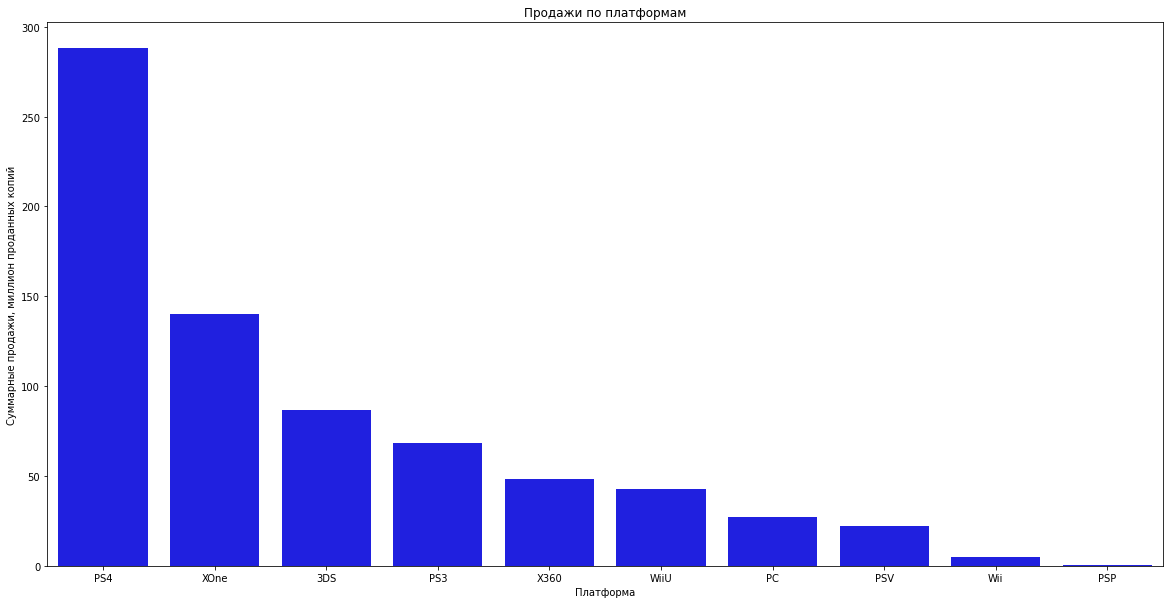

In [35]:
#диаграмма для топ-5 платформ по объемам продаж
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='platform',
            y='all_sales',
            data=sales_by_platform,
            palette=['blue'])

ax.set_title('Продажи по платформам')
ax.set(xlabel='Платформа', ylabel='Суммарные продажи, миллион проданных копий')

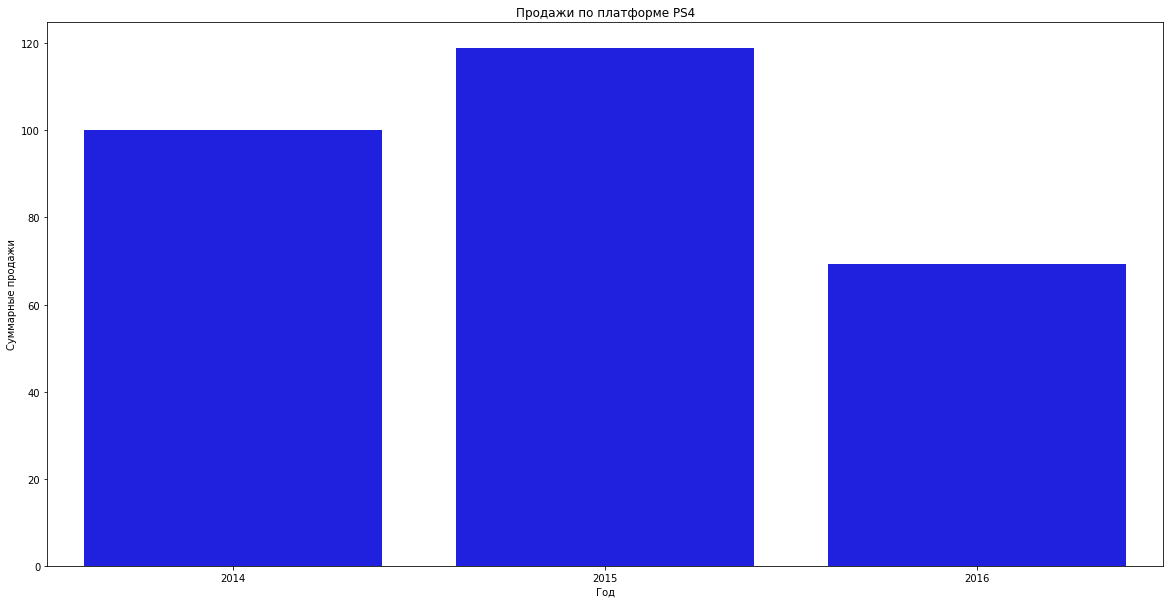

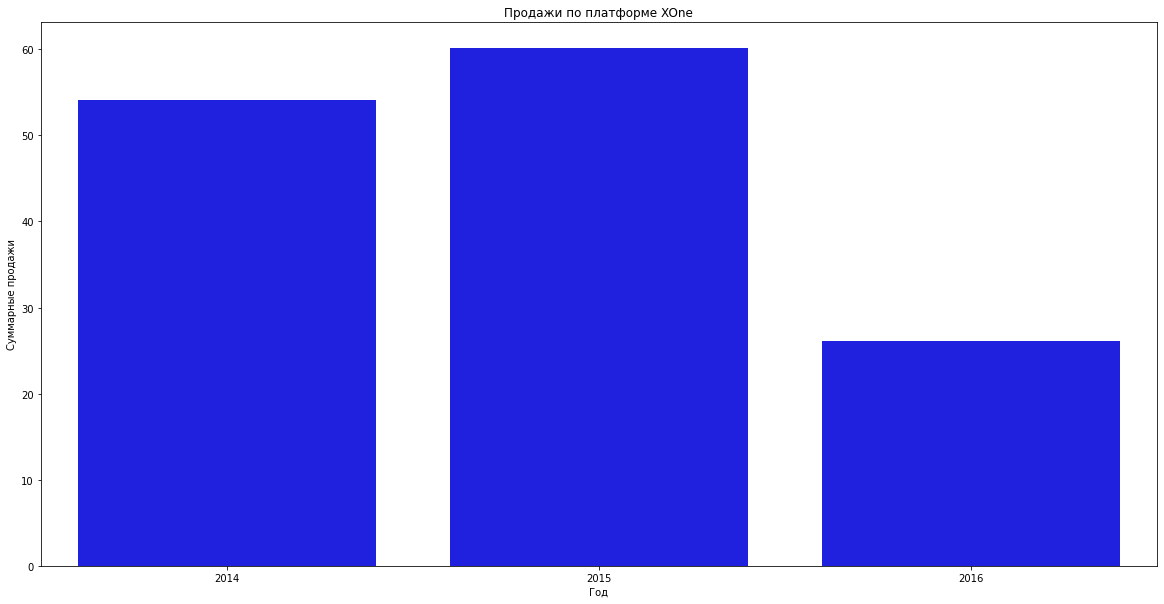

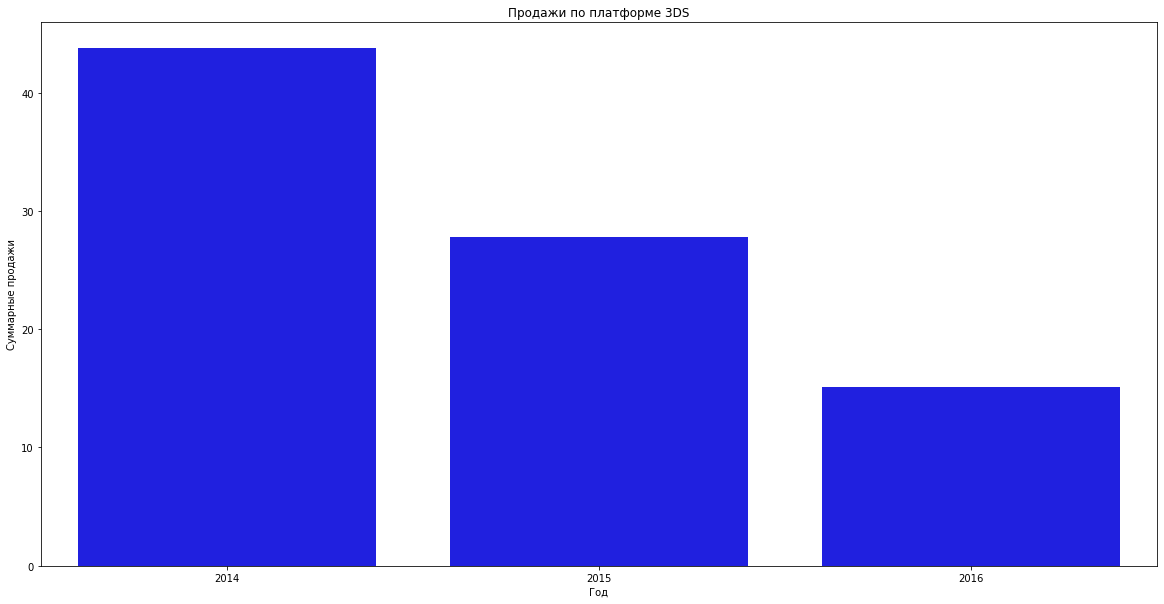

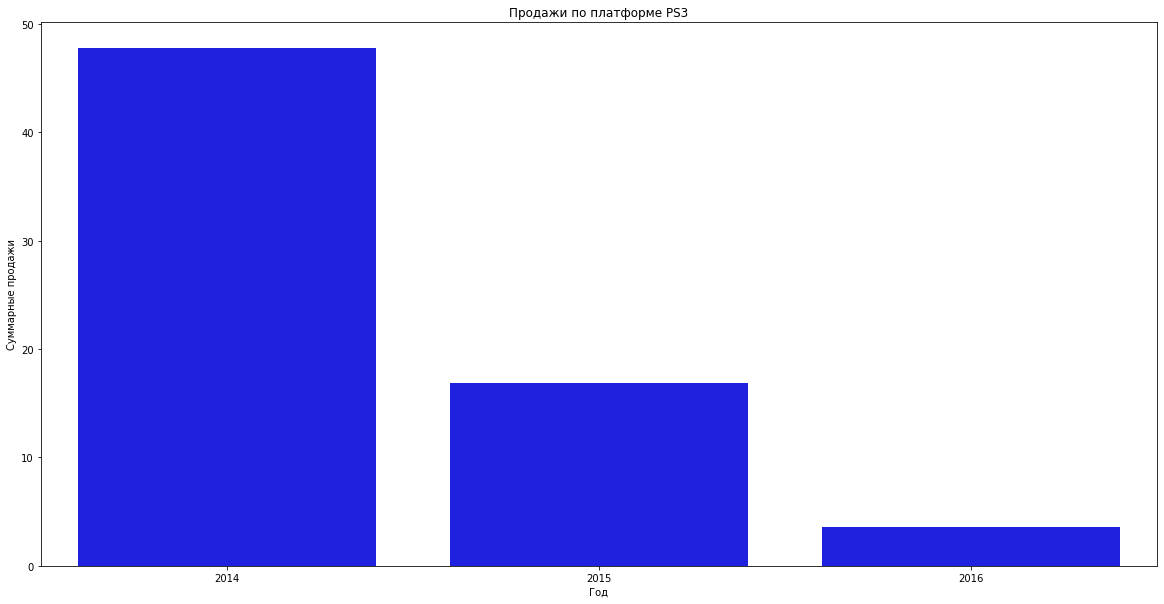

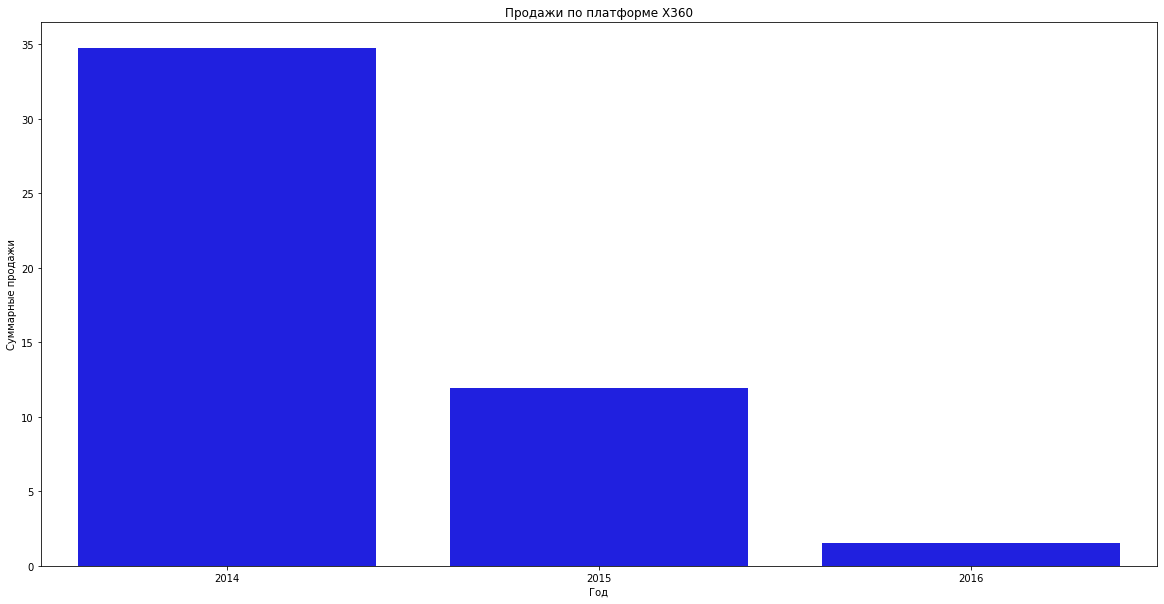

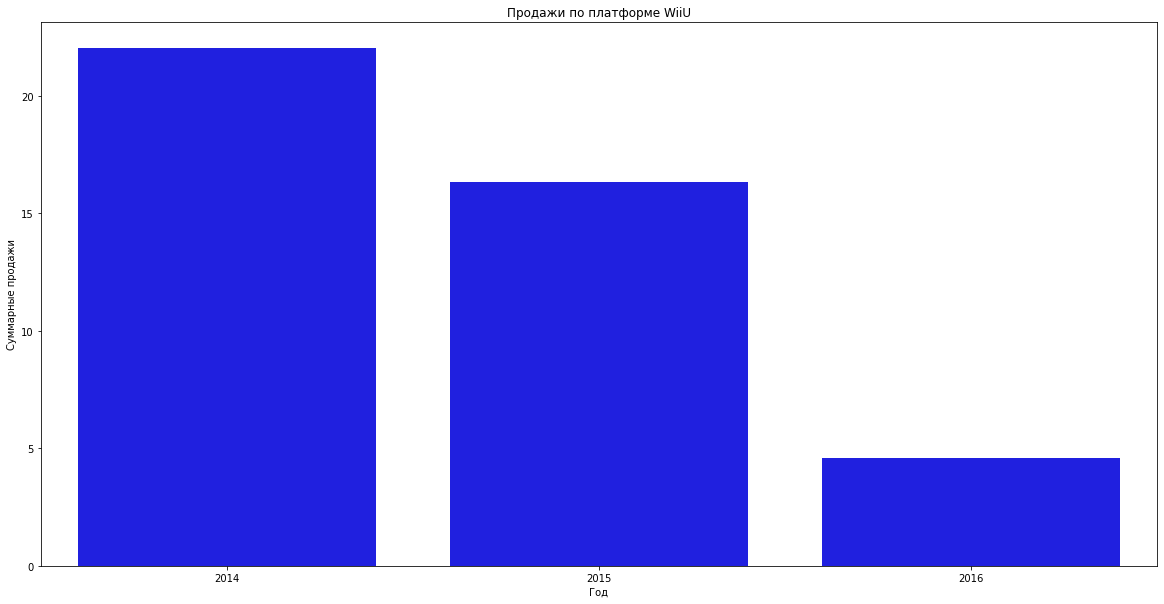

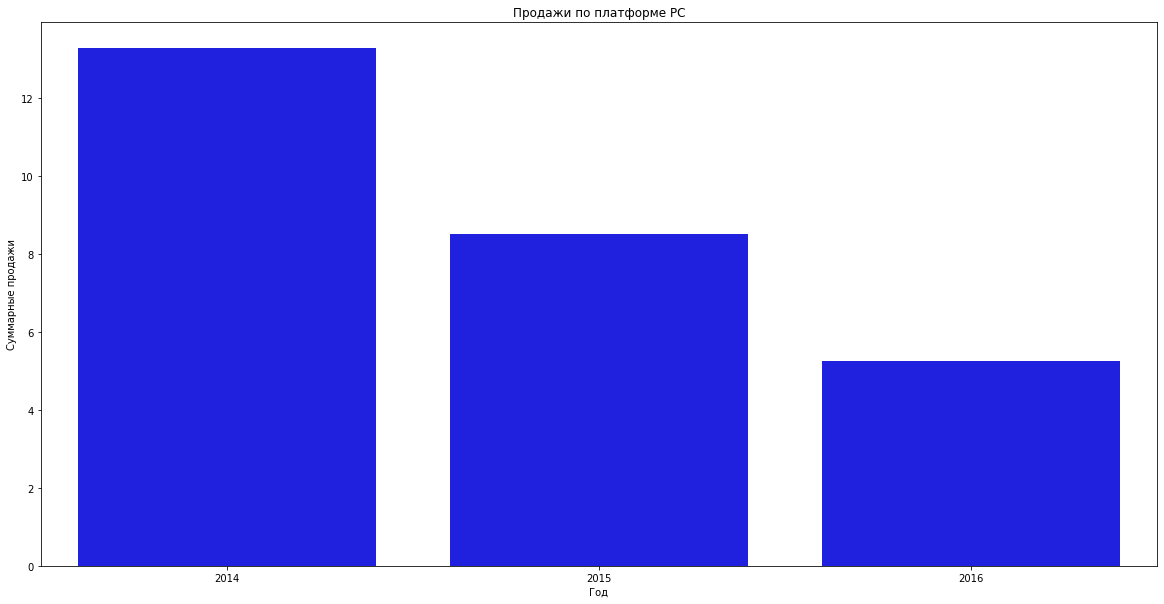

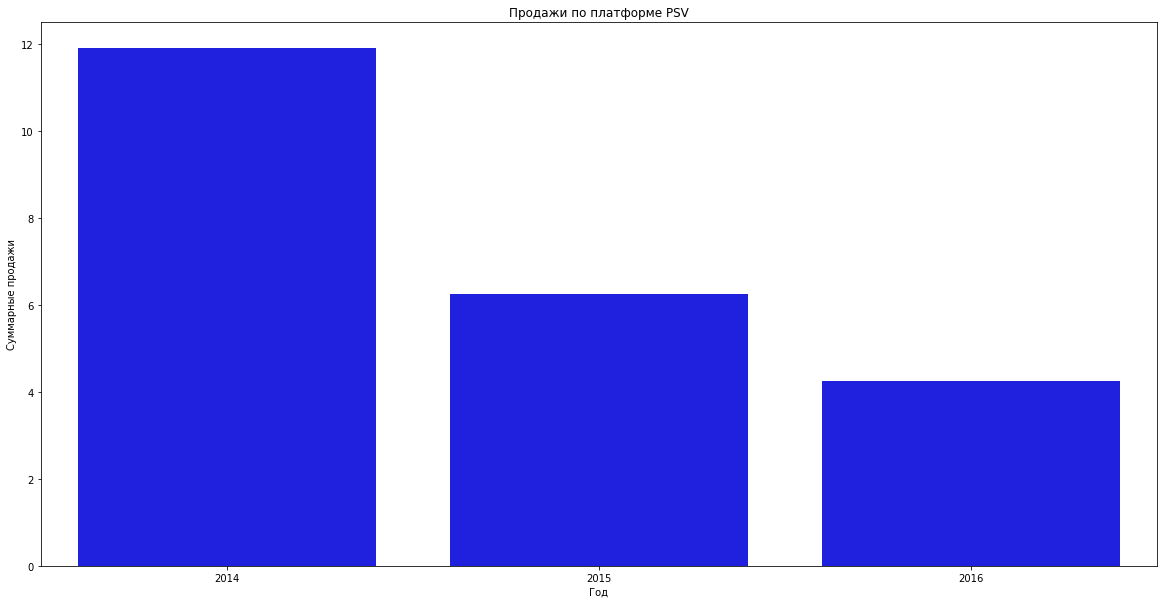

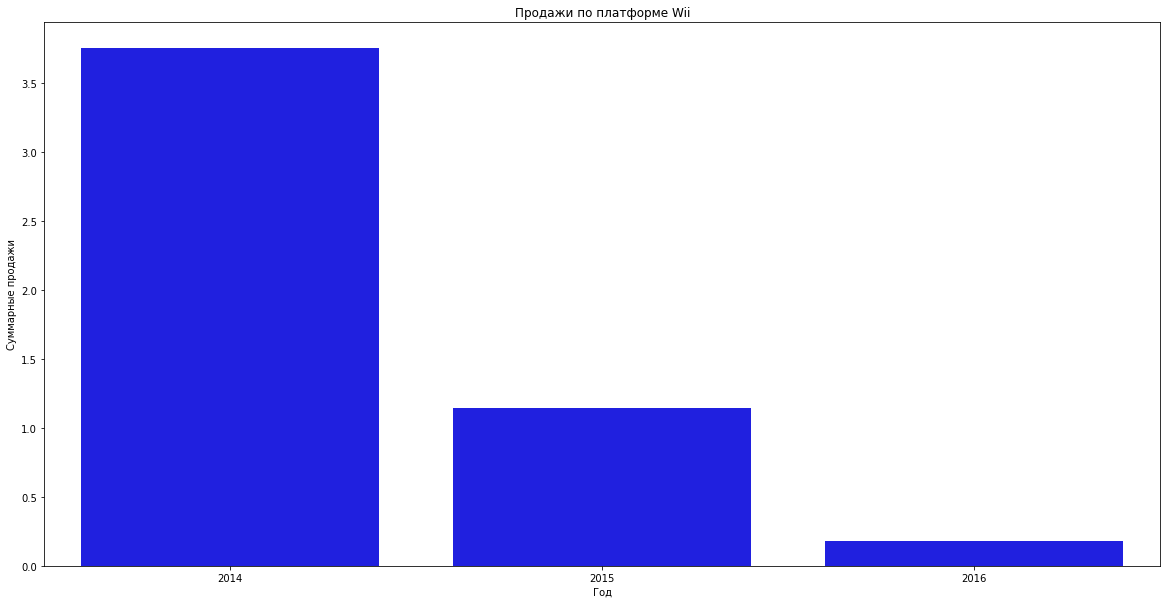

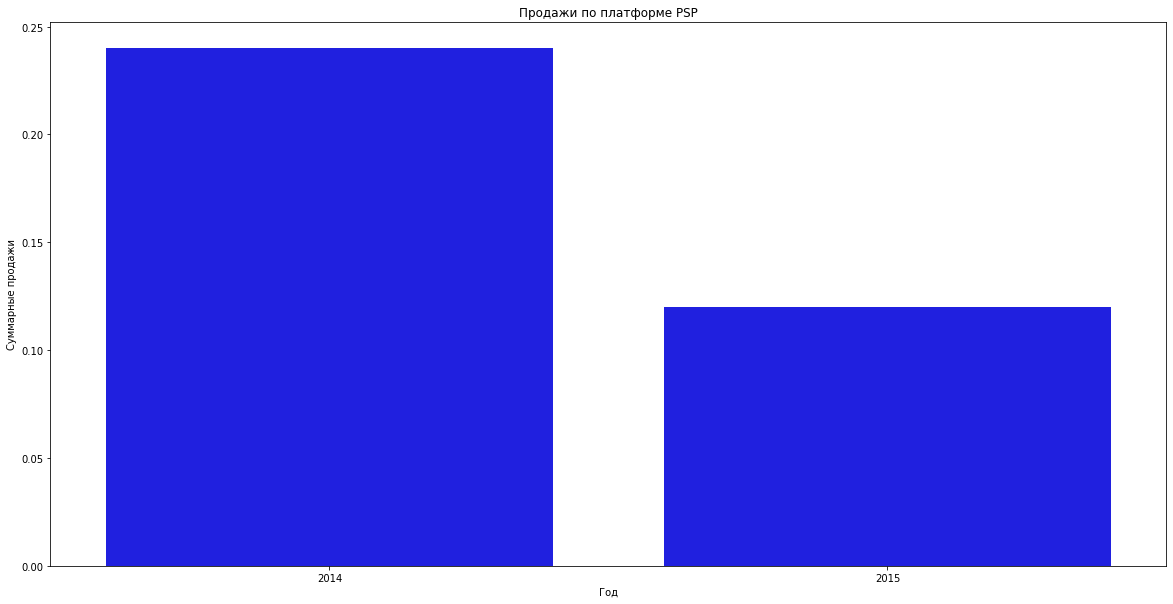

In [36]:
#группируем продажи по топ платформам по годам
top_platform = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']
for i in top_platform:
    sales_by_platform = data[(data['platform']==i)].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
    sales_by_platform['year_of_release'] = sales_by_platform.index
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x='year_of_release', y='all_sales', data=sales_by_platform,palette=['blue'])
    ax.set_title(f'Продажи по платформe {i}')
    ax.set(xlabel='Год', ylabel='Суммарные продажи')

[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Суммарные продажи')]

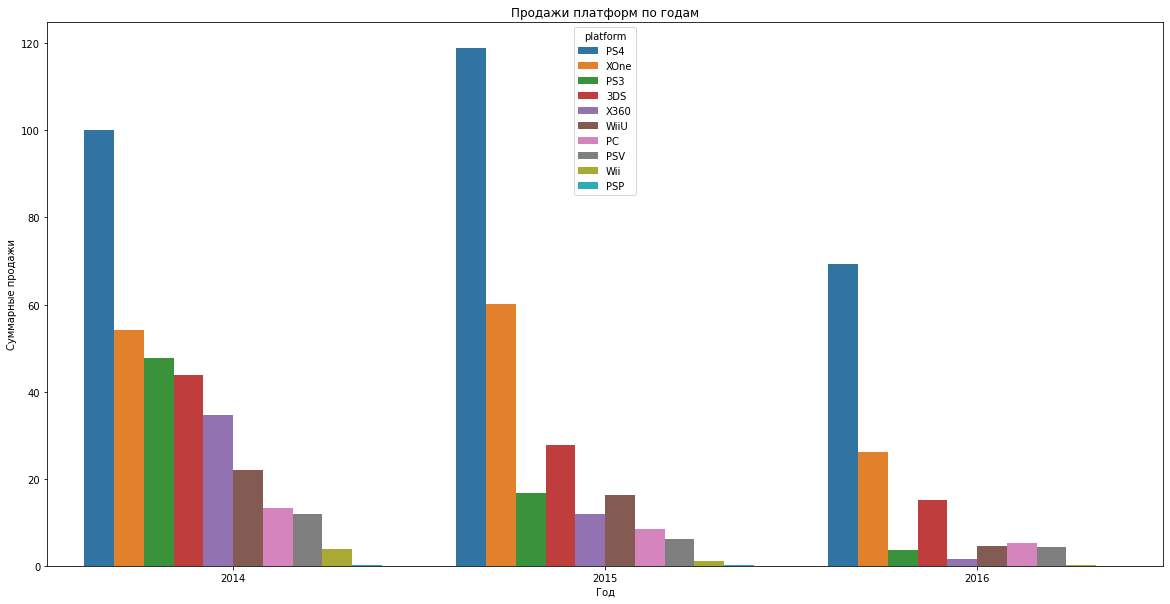

In [37]:
leaders = data.groupby(by=['year_of_release','platform'])[['all_sales']].sum().sort_values\
(by='all_sales', ascending=False).reset_index()
leaders['year_of_release'] = leaders['year_of_release'].astype(int)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='year_of_release', y='all_sales', data=leaders, hue='platform', ax=ax)
ax.set_title('Продажи платформ по годам')
ax.set(xlabel='Год', ylabel='Суммарные продажи')

<div style="border:solid blue 2px; padding: 20 px">
Лидируют по продажам следующие  платформы: PS4, XOne, 3DS, X360, PS3. У платформ PS4 и XOne суммарный объем продаж растет до 2015 года и падает почти в два раза в 2016 году. У платформ 3DS, PC и WiiU наблюдается плавный спад в продажах, у остальных платформ - резкий.

Потенциально прибыльными будем считать - PS4, XOne.
</div>

In [38]:
#разобьем платформы на стационарные и портативные для постороения ящика с усами
platform_portable = [ '3DS', 'WiiU', 'PSV', 'PSP']
platform_stat = ['PS4', 'XOne', 'PS3', 'X360', 'PC', 'Wii']
data_portable = data[data['platform'].isin(platform_portable)]
data_stat = data[data['platform'].isin(platform_stat)]

Text(0, 0.5, 'Продажи игр, млн.копий')

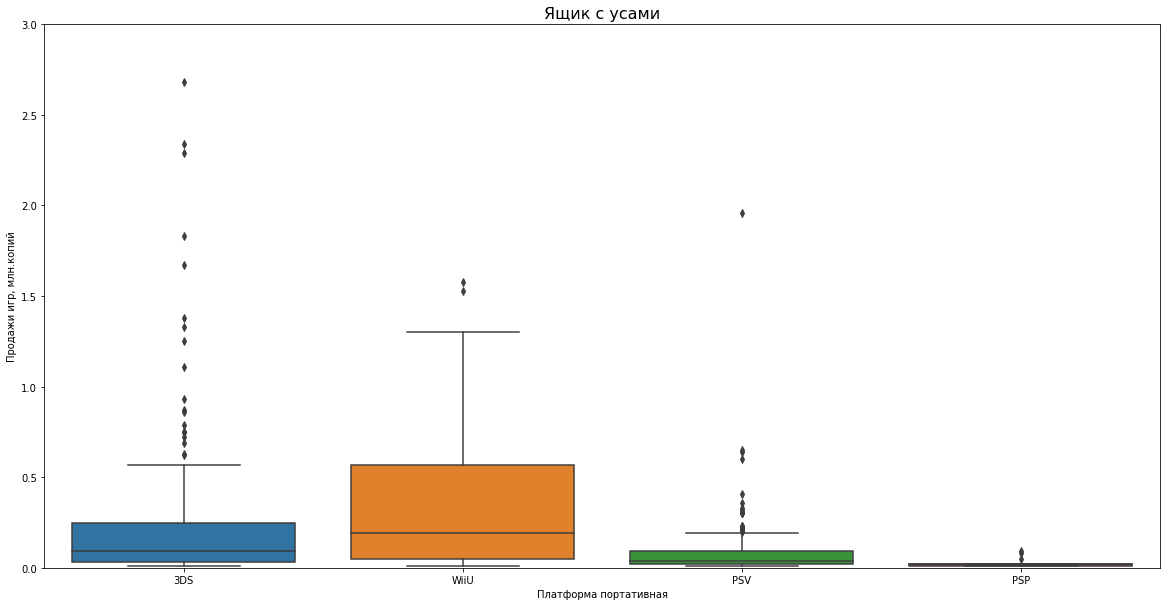

In [39]:
#ящик с усами портативные
plt.figure(figsize=(20,10))
sns.boxplot(data=data_portable, x='platform', y='all_sales')
plt.ylim(0, 3)
plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Платформа портативная',fontsize=10)
plt.ylabel('Продажи игр, млн.копий',fontsize=10)

<div style="border:solid blue 2px; padding: 20 px">
По усам на диаграмме размаха можно предположить, что на портативной платформе 3DS входили самые громкие (продаваемые) релизы. У платформы WiiU больше медиана, значит в среднем игры продаются лучше (на платформе 3DS "выстреливают" определенные игры). Низкие продажи наблюдаются на платформах PSV и PSP.
</div>

Text(0, 0.5, 'Продажи игр, млн.копий')

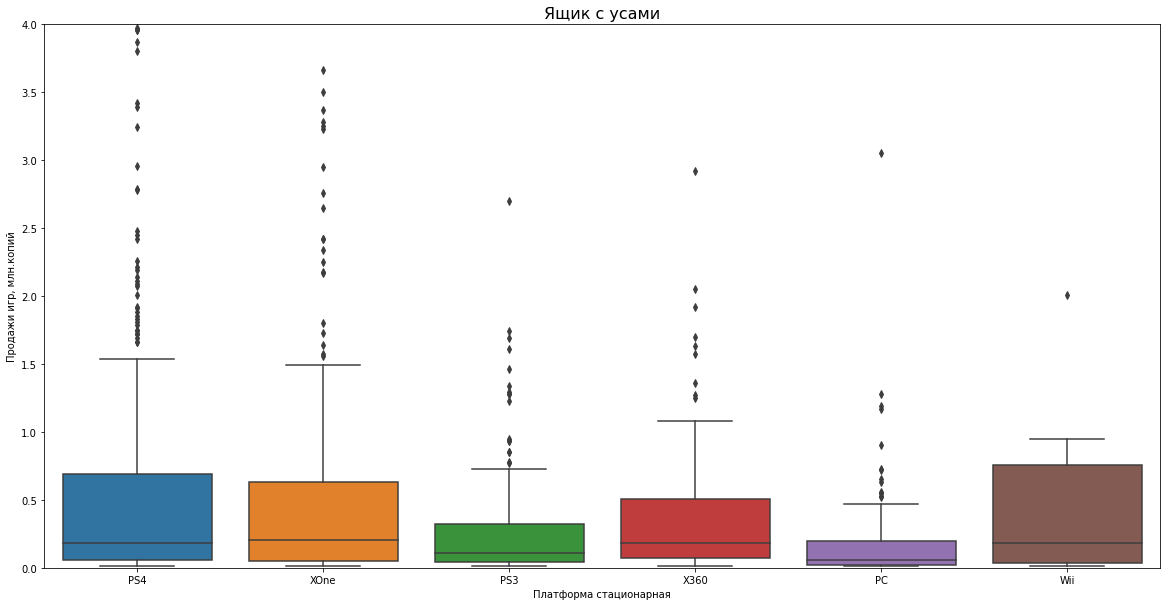

In [40]:
#ящик с усами стационарные
plt.figure(figsize=(20,10))
sns.boxplot(data=data_stat, x='platform', y='all_sales')
plt.ylim(0, 4)
plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Платформа стационарная',fontsize=10)
plt.ylabel('Продажи игр, млн.копий',fontsize=10)

<div style="border:solid blue 2px; padding: 20 px">
Самые продаваемые релизы на платформах PS4 и XOne. Заметно,что квартили Q1, Q3 и медиана лежат почти на одном уровне, а также идентичные размеры усов), что может говорить о том, что они являются прямыми конкурентами. Меньшее количество релизов наблюдается на PS3, XOne, так как на 2016 год они являются устаревшими. Наименьшее разнообразие игр (продаж) наблюдается на PC.
</div>

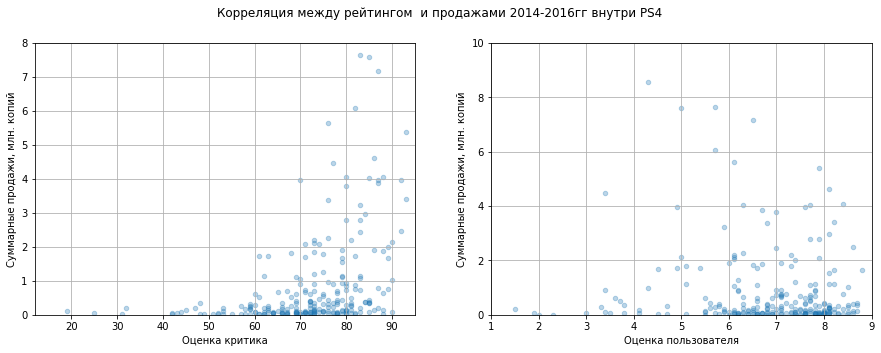

In [41]:
#проверяем взаимосвязнь отзывов критиков с продажами внутри самой популярной платформы - PS4
figure, ax = plt.subplots(1, 2, figsize=(15,5))
data[(data['platform']=="PS4") & (data['critic_score']>=0)].plot(ax=ax[0], x='critic_score', y='all_sales', kind='scatter', alpha=0.3, xlim=(12, 95), ylim=(0, 8), grid=True)
plt.suptitle('Корреляция между рейтингом  и продажами 2014-2016гг внутри PS4')
ax[0].set_xlabel('Оценка критика')
ax[0].set_ylabel('Суммарные продажи, млн. копий')
#проверяем взаимосвязнь отзывов пользователей с продажами внутри самой популярной платформы - PS4
data[(data['platform']=="PS4") & (data['user_score']>0)].plot(ax=ax[1], x='user_score', y='all_sales', kind='scatter', alpha=0.3, xlim=(1, 9), ylim=(0, 10), grid=True)
ax[1].set_xlabel('Оценка пользователя')
ax[1].set_ylabel('Суммарные продажи, млн. копий')
plt.show()

In [42]:
#подготовим данные для расчета коэффициента корреляции по каждой платформе
data_corr = data[data['critic_score']>=0].groupby(by='platform')[['name','all_sales','platform','critic_score', 'user_score']]
data_corr.describe().T

platform                  3DS          PC        PS3         PS4        PSV  \
all_sales    count  51.000000  116.000000  36.000000  237.000000  54.000000   
             mean    0.479020    0.205690   0.315556    0.925823   0.148704   
             std     0.775472    0.352899   0.346290    1.651592   0.126058   
             min     0.010000    0.010000   0.010000    0.010000   0.010000   
             25%     0.075000    0.030000   0.095000    0.070000   0.070000   
             50%     0.210000    0.095000   0.160000    0.260000   0.110000   
             75%     0.450000    0.232500   0.432500    0.930000   0.177500   
             max     3.890000    3.050000   1.280000   12.620000   0.650000   
critic_score count  51.000000  116.000000  36.000000  237.000000  54.000000   
             mean   68.980392   76.215517  66.555556   72.164557  72.259259   
             std    12.858445    9.769345  13.557169   12.214985   7.816734   
             min    26.000000   43.000000  36.000000   19.000000  57.000000   
             25%    63.500000   71.000000  58.750000   66.000000  67.000000   
             50%    69.000000   77.000000  67.000000   73.000000  72.000000   
             75%    78.500000   83.250000  75.250000   80.000000  76.750000   
             max    90.000000   96.000000  91.000000   97.000000  93.000000   
user_score   count  51.000000  116.000000  36.000000  237.000000  54.000000   
             mean    6.662745    6.278448   6.330556    6.733333   7.707407   
             std     2.577593    1.788067   1.665416    1.638425   1.347934   
             min    -1.000000   -1.000000   3.100000   -1.000000  -1.000000   
             25%     6.350000    5.375000   5.125000    6.200000   7.400000   
             50%     7.400000    6.800000   6.800000    7.100000   7.850000   
             75%     8.200000    7.600000   7.725000    7.900000   8.400000   
             max     9.000000    9.300000   8.600000    9.200000   9.300000   

platform                 WiiU       X360        XOne  
all_sales    count  43.000000  26.000000  155.000000  
             mean    0.791163   0.388462    0.745032  
             std     1.292934   0.430680    1.047178  
             min     0.010000   0.040000    0.010000  
             25%     0.125000   0.060000    0.100000  
             50%     0.420000   0.135000    0.310000  
             75%     0.800000   0.707500    1.045000  
             max     7.090000   1.360000    5.470000  
critic_score count  43.000000  26.000000  155.000000  
             mean   71.186047  63.730769   73.793548  
             std    13.971494  15.058706   12.252589  
             min    32.000000  32.000000   20.000000  
             25%    66.500000  51.500000   66.500000  
             50%    73.000000  67.000000   76.000000  
             75%    81.500000  73.500000   83.000000  
             max    91.000000  91.000000   97.000000  
user_score   count  43.000000  26.000000  155.000000  
             mean    7.034884   6.142308    6.423871  
             std     1.813033   1.506300    1.778664  
             min    -1.000000   3.800000   -1.000000  
             25%     6.500000   4.875000    5.750000  
             50%     7.400000   6.200000    6.800000  
             75%     8.300000   7.300000    7.550000  
             max     9.100000   8.700000    9.200000

In [43]:
#рассчитаем коэффициент корреляции между продажами по миру и оценками пользователей и критиков
corr = data_corr.corr()
corr 

all_sales  critic_score  user_score
platform                                                  
3DS      all_sales      1.000000      0.314117    0.274369
         critic_score   0.314117      1.000000    0.671354
         user_score     0.274369      0.671354    1.000000
PC       all_sales      1.000000      0.174634   -0.067356
         critic_score   0.174634      1.000000    0.459586
         user_score    -0.067356      0.459586    1.000000
PS3      all_sales      1.000000      0.446575    0.156595
         critic_score   0.446575      1.000000    0.693445
         user_score     0.156595      0.693445    1.000000
PS4      all_sales      1.000000      0.402661   -0.005041
         critic_score   0.402661      1.000000    0.478431
         user_score    -0.005041      0.478431    1.000000
PSV      all_sales      1.000000      0.042665    0.048583
         critic_score   0.042665      1.000000    0.268782
         user_score     0.048583      0.268782    1.000000
WiiU     all_sales      1.000000      0.370201    0.346501
         critic_score   0.370201      1.000000    0.513229
         user_score     0.346501      0.513229    1.000000
X360     all_sales      1.000000      0.525723    0.336514
         critic_score   0.525723      1.000000    0.625309
         user_score     0.336514      0.625309    1.000000
XOne     all_sales      1.000000      0.428677    0.007396
         critic_score   0.428677      1.000000    0.429468
         user_score     0.007396      0.429468    1.000000

<AxesSubplot:ylabel='platform-None'>

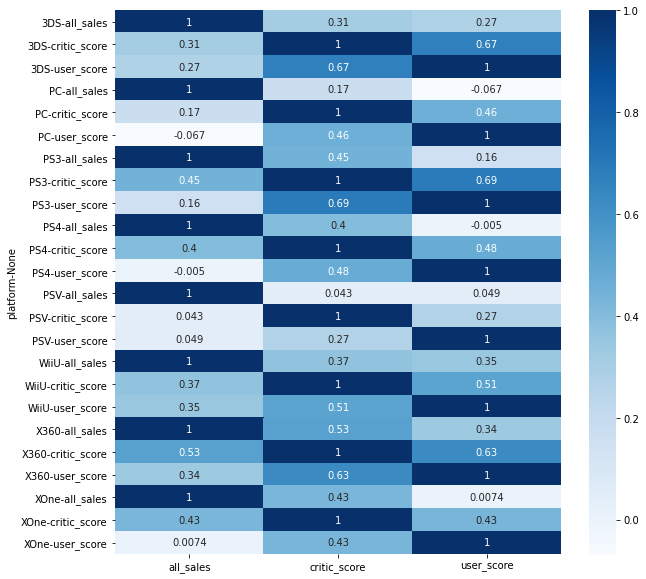

In [44]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='Blues',annot=True)

<div style="border:solid blue 2px; padding: 20 px">
По построенным диаграммам рассеивания, а так же по посчитанному коэффициенту Пирсона видно, что для самой популярной платформы PS4, скорее всего, взаимосвязи ни прямой, ни обратной между оценками критиков/пользователей и продажами не наблюдается.
</div>

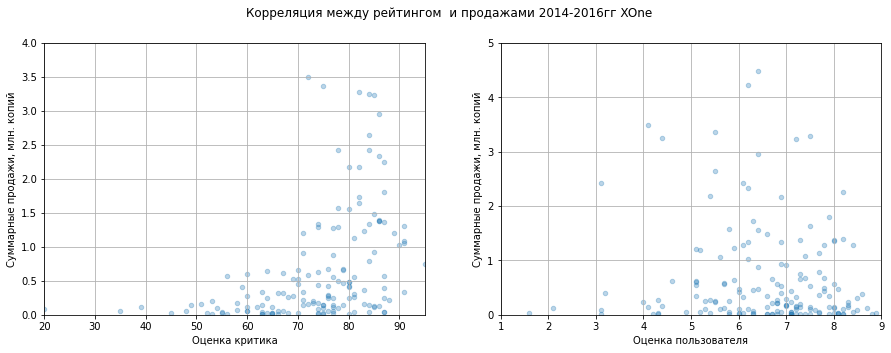

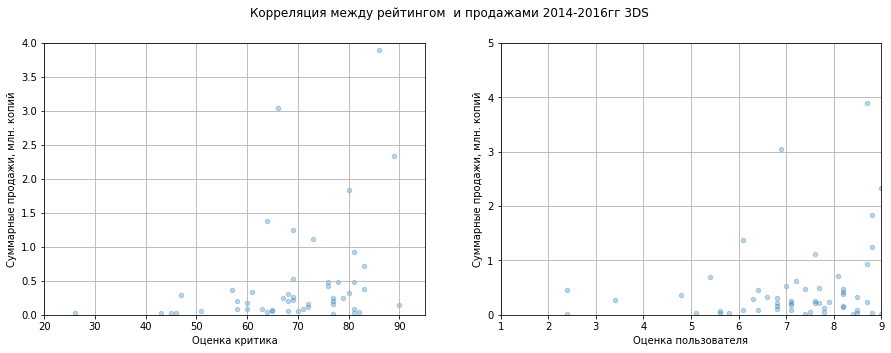

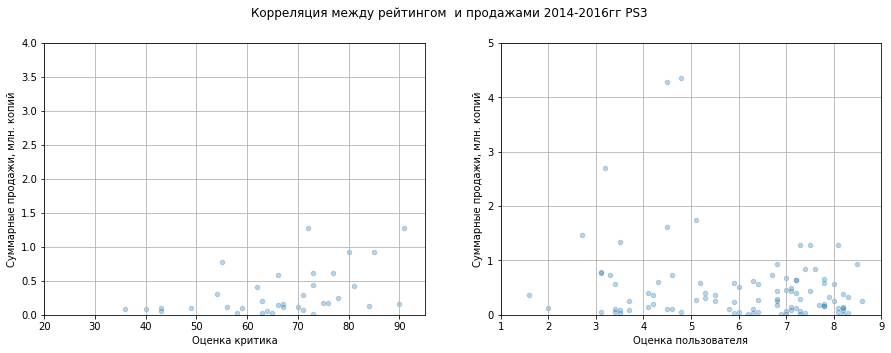

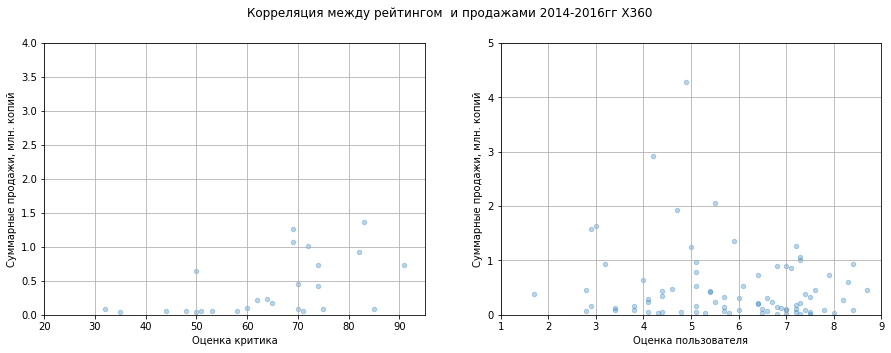

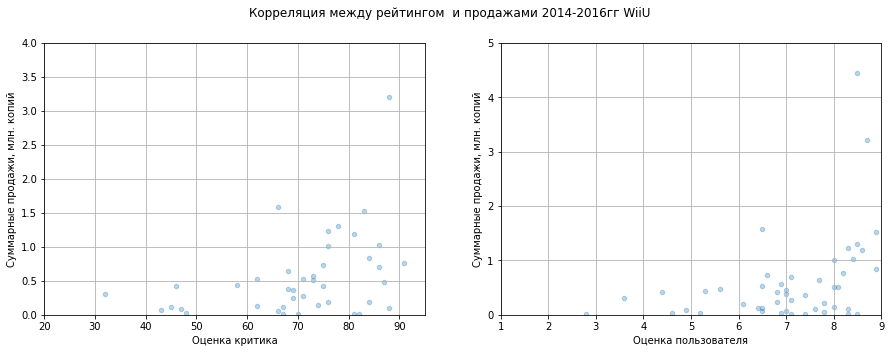

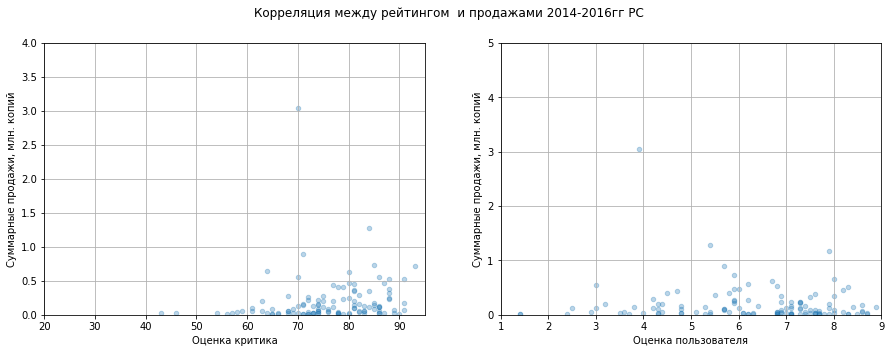

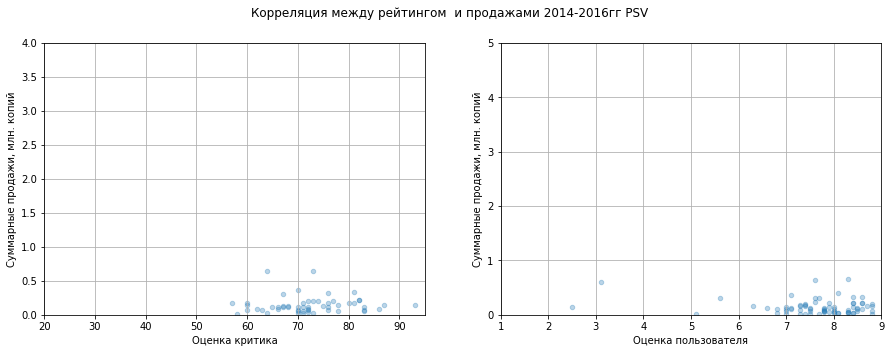

In [45]:
#проверяем взаимосвязнь отзывов пользователей с продажами внутри всех платформ
platform_corr = ['XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV']
for i in platform_corr:
    figure, ax = plt.subplots(1, 2, figsize=(15,5))
    data[(data['platform']==i) & (data['critic_score']>=0)].plot(ax=ax[0], x='critic_score', y='all_sales', kind='scatter', alpha=0.3, xlim=(20, 95), ylim=(0, 4), grid=True)
    plt.suptitle(f'Корреляция между рейтингом  и продажами 2014-2016гг {i}')
    ax[0].set_xlabel('Оценка критика')
    ax[0].set_ylabel('Суммарные продажи, млн. копий')
#проверяем взаимосвязнь отзывов пользователей с продажами внутри всех платформ
    data[(data['platform']==i) & (data['user_score']>0)].plot(ax=ax[1], x='user_score', y='all_sales', kind='scatter', alpha=0.3, xlim=(1, 9), ylim=(0, 5), grid=True)
    ax[1].set_xlabel('Оценка пользователя')
    ax[1].set_ylabel('Суммарные продажи, млн. копий')
    plt.show()

<div style="border:solid blue 2px; padding: 20 px">
Аналогично и для других платформ, анализ не выявил сильной корреляции между оценками критиков/пользователей и продажами по всем регионами. Либо она есть, но сложнее, чем кажется.
</div>

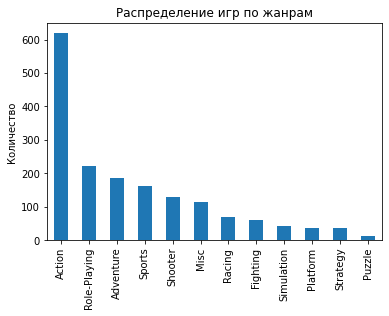

In [46]:
#распределение игр по жанрам
data['genre'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Распределение игр по жанрам')
plt.ylabel('Количество')
plt.show()

<div style="border:solid blue 2px; padding: 20 px">

Наибольшее количество игр выпущено в жанрах: "Action", "Role-Playing", "Adventure", "Sports", "Shooter".
    
</div>

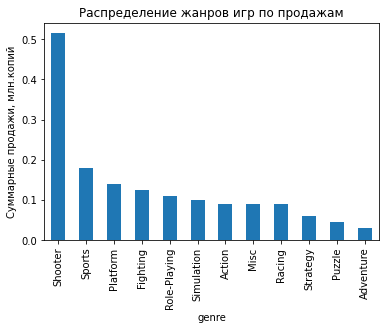

In [47]:
# рассмотрим прибыльность жанров
data.groupby(by='genre')['all_sales'].median().sort_values(ascending=False).plot.bar()
plt.title('Распределение жанров игр по продажам')
plt.ylabel('Суммарные продажи, млн.копий')
plt.show()

<div style="border:solid blue 2px; padding: 20 px">
Наибольшее количество продаж по всему миру наблюдается у жанров "Shooter", "Sports", "Platform", "Fighting". Низкие продажи для следующих категорий: "Adventure","Puzzle", "Strategy". Посмотрим диграмму размаха для жанров с высокими и низкими продажами.
</div>

Text(0, 0.5, 'Продажи игр, млн.копий')

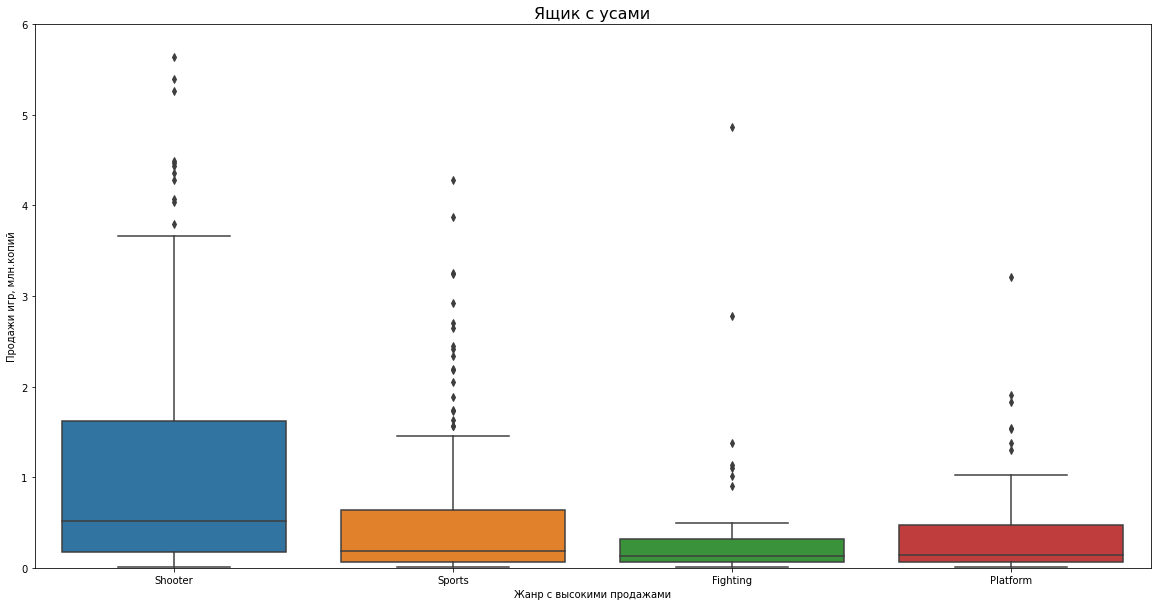

In [67]:
#ящик с усами по жанрам с высокими продажами
plt.figure(figsize=(20,10))
sns.boxplot(data=data.query("genre in ['Shooter', 'Sports', 'Platform', 'Fighting']"), x='genre', y='all_sales')
plt.ylim(0, 6)
plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Жанр с высокими продажами',fontsize=10)
plt.ylabel('Продажи игр, млн.копий',fontsize=10)

<div style="border:solid blue 2px; padding: 20 px">
Медианное значение суммарных продаж  в жанрах "Shooter" и "Sports" выше, чем у "Fighting" и "Platform", а также сам «ящик» (ограничен первым и третьим квартилями) имеет больший рамер. Можно сделать вывод, что данные категории имеют более стабильные релизы. Жанры "Shooter" и "Sports" имеют значительное количество выбросов за "усами", значит в данных категориях присутствует больше бестселлеров - игр с высокими продажами.
</div>

Text(0, 0.5, 'Продажи игр, млн.копий')

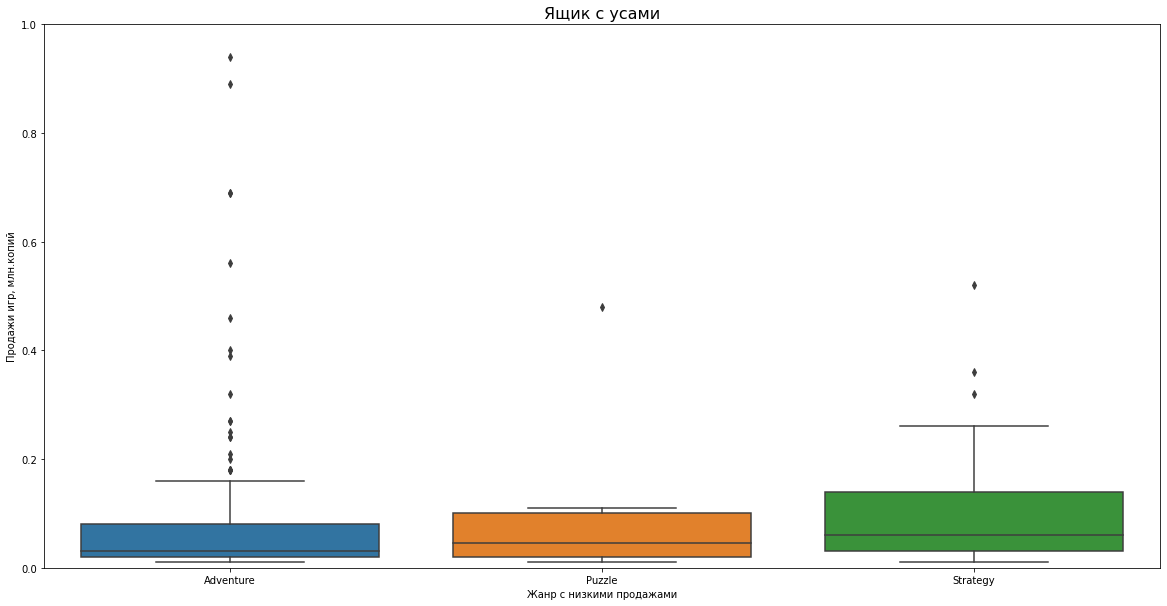

In [64]:
#ящик с усами по жанрам с низкими продажами
plt.figure(figsize=(20,10))
sns.boxplot(data=data.query("genre in ['Adventure', 'Puzzle', 'Strategy']"), x='genre', y='all_sales')
plt.ylim(0, 1)
plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Жанр c низкими продажами',fontsize=10)
plt.ylabel('Продажи игр, млн.копий',fontsize=10)

Text(0, 0.5, 'Продажи игр, млн.копий')

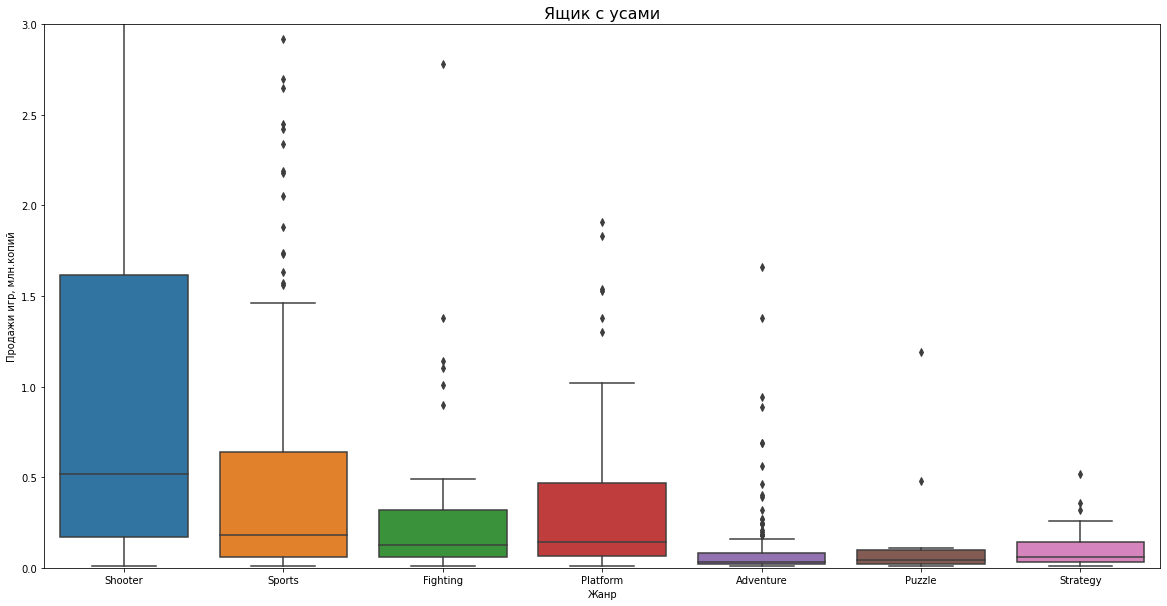

In [50]:
#ящик с усами по жанрам
plt.figure(figsize=(20,10))
sns.boxplot(data=data.query("genre in ['Shooter', 'Sports', 'Platform', 'Fighting', 'Adventure', 'Strategy', 'Puzzle']"), x='genre', y='all_sales')
plt.ylim(0, 3)
plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Жанр',fontsize=10)
plt.ylabel('Продажи игр, млн.копий',fontsize=10)

<div style="border:solid blue 2px; padding: 20 px">
Жанр "Adventure" имеет в 4 раза больше выпускаемых игр по сравнению с другими жанрами с низкими продажами, поэтому на графике заметно большое количество выбросов (в данных наблюдается большой разброс -> в среднем выпускаются не очень удачные релизы, но присутствуют и бестселлы - "выбросы" за усами). Медианные значения продаж на графике и размер "ящика" свидетельствуют о том, что действительно жанры "Puzze", "Strategy" и "Adventure" хуже продаются по сравнению с лидерами-продаж "Shooter", "Sports", "Fighting" и "Platform".
</div>

<div style="border:solid green 2px; padding: 20 px">

**Вывод**
    
ТОП-5 платформ по продажам с 1980 по 2016г.г.: "PS2", "X360", "PS3", "Wii", "DS".
    
Для прогноза на 2017 год был взят актуальный период - 2014-2016г.г., так как на примере жизненного цикла платформ показано, что игровая отрасль является динамично меняющейся.
    
Для нового периода лидируют по продажам следующие  платформы: PS4, XOne, 3DS, X360, PS3.
    
Самые продаваемые релизы на платформах PS4 и XOne.По идентичным диаграммам размаха (boxplot) сделан вывод о том, что данные платформы являются прямыми конкурентами. Меньшее количество релизов наблюдается на PS3, XOne, так как на 2016 год они являются устаревшими. 
    
Для всех платформ платформ анализ не выявил сильной корреляции между оценками критиков/пользователей и продажами по всем регионами. 
    
Наибольшее количество игр за 2014-2016г.г. выпущено в жанрах: "Action", "Role-Playing", "Adventure", "Sports", "Shooter".
    
Лучшие продажи релизов наблюдаются для следующих жанров: "Shooter", "Sports", "Fighting" и "Platform".

Наименьшее количество проданных копий характерно для жанров: "Puzze", "Strategy", "Adventure" (в целом релизы данного жанра не очень удачны, но присутвуют и игры с хорошими продажами).
    
</div>

## Портрет пользователя региона

### Самые популярные платформы (топ-5) для каждого региона

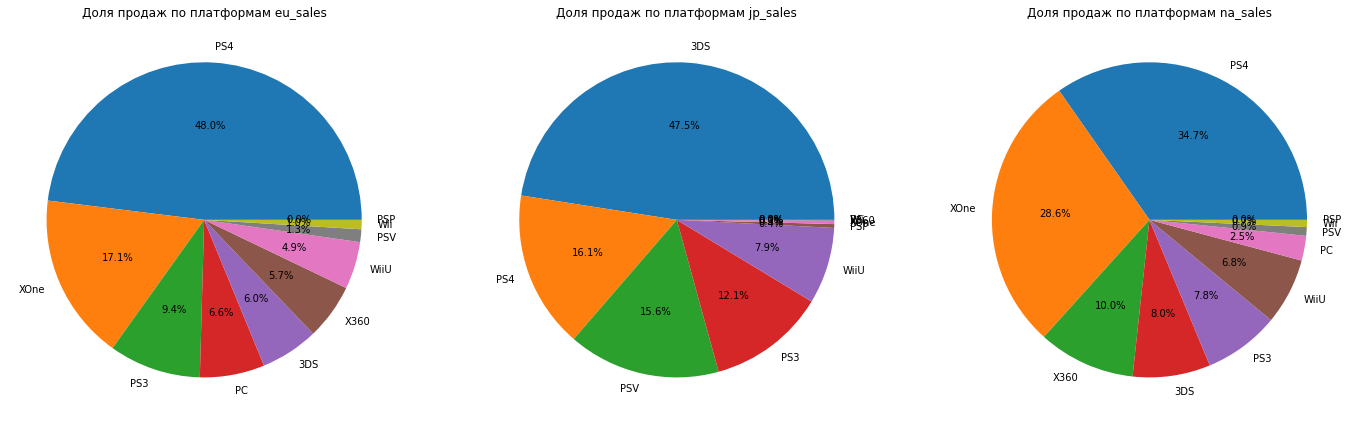

In [51]:
#популярные платформы для каждого региона в зависимости от продаж
region = ['eu_sales', 'jp_sales', 'na_sales']
figure, ax = plt.subplots(1,3, figsize=(24,8))
for j,i in enumerate(region):
    data_region = data.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending=False)
    ax[j].pie(data_region[i].values, labels=data_region.index, autopct='%1.1f%%')
    ax[j].set_title(f'Доля продаж по платформам {i}')
#    ax[j].autopct=lambda x: f'{x:.1f}%' if x>5 else None
#   ax[j].labels=[name if value >5 else '' for name, value in zip(data_region.index, data_region[i])]
plt.show()

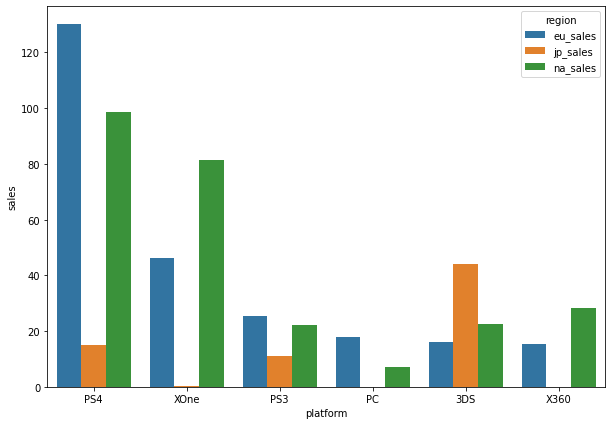

In [52]:
#столбчатая диаграмма
platform_sales = data.groupby(by='platform')[['eu_sales', 'jp_sales', 'na_sales']].sum().\
    round(2).sort_values(by='eu_sales', ascending=False)[:6].stack().reset_index()
platform_sales.columns = ['platform', 'region', 'sales']
plt.figure(figsize=(10,7))
sns.barplot(data=platform_sales, x='platform', y='sales', hue='region')
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
По круговой диагрмамме видно, что для европейского рынка самой популярной является платформа PS4, почти половина продаж приходится именно на нее (более 120 млн.копий), второй по популярности - XOne (но количество проданных копий меньше почти в три раза). Остальные платформы (за исключением PSP, PSV и Wii) в целом распределены относительно равномерно.
    
Для американского рынка платформа PS4 также является лидером продаж, но занимает уже значительно меньшую долю около 35%. Немного теряя в продажах, но все еще занимая значительную долю рынка, второе место, как и на европейском рынке, занимает - XOne. Остальные платформы (за исключением PSP, PSV и Wii) занимают примерно одинаковый процент рынка, распределение даже более равномерное, чем на европейском рынке, что говорит о высокой конкуренции и стальнном спросе.

Японский рынок предпочитает консоли семейства Nintendo (японская компания): 3DS, Wiiu - суммарно они занимают большую долю рынка. Также важным игроком в индустрии является PSV, PS4 - консоли от Sony, которая также является японской транснациональной корпорацией. Хочется отметить, что консоли 3DS, Wiiu и PSV являются портивными. Скорее всего, это связано с тем, что японцы предпочитают играть в дороге из-за сложившегося ритма жизни . 

Платформы WiiU, PS3 популярны одинаково как в Японии, так и в других странах и имеют долю продаж на рынках от 5 до 15%.
</div>

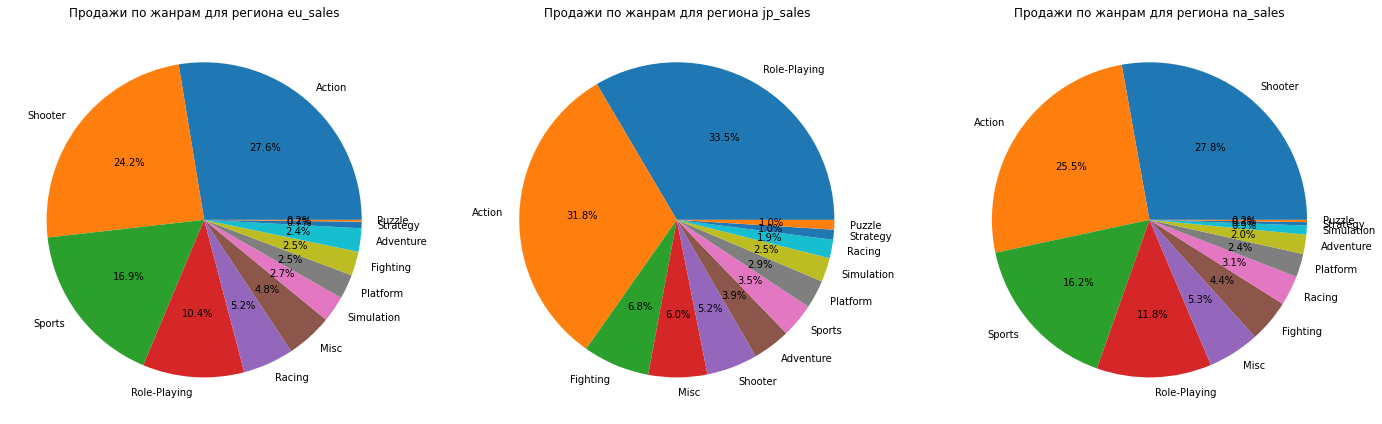

In [53]:
#популярные жанры для каждого региона в зависимости от продаж
region=['eu_sales', 'jp_sales', 'na_sales']
figure, ax = plt.subplots(1,3, figsize=(24,8))
for j,i in enumerate(region):
    data_region = data.pivot_table(index='genre', values=i, aggfunc='sum').sort_values(by=i, ascending=False)
#    data_region.plot(ax=ax[j], kind='pie', y=i, autopct='%1.1f%%')
    ax[j].pie(data_region[i].values,labels=data_region.index, autopct='%1.1f%%')
    ax[j].set_title(f'Продажи по жанрам для региона {i}')
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
По самым популярным жанрам европейский и американский рынок похож. ТОП-4 занимают одни и те же жанры почти с одинаковой долей продаж: Action, Shooter, Sports, Role-Playing. 
    
А вот на японском рынке распределение продаж по жанрам другое, лидер - Role-Playing с долей продаж почти 34%, следом идет Action. Оставшиеся жанры Fighter, Misc, Shooter, Adventure и др. занимают значительно меньшею долю (от 7% и менее). 
    
В целом и американский, и европейский, и японский рынок имеет пересечения по популярным жанрам, но если смотреть на картину в целом (с процентным соотношением по менее популряным жанрам), то очевидно различие во вкусах.
</div>

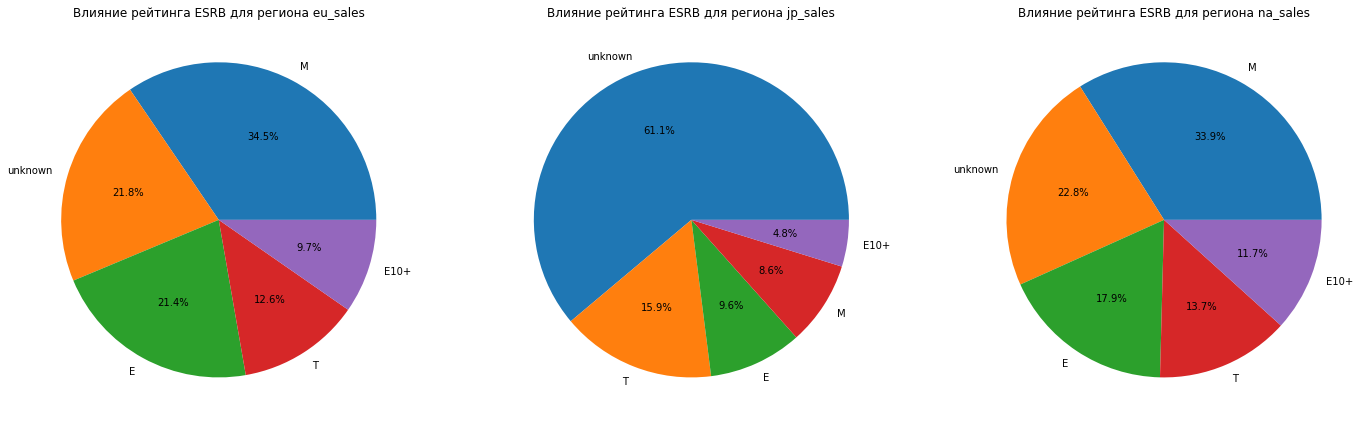

In [54]:
region=['eu_sales', 'jp_sales', 'na_sales']
figure, ax = plt.subplots(1,3, figsize=(24,8))
for j,i in enumerate(region):
    data_region = data.pivot_table(index='rating', values=i, aggfunc='sum').sort_values(by=i, ascending=False)
#    data_region.plot(ax=ax[j], kind='pie', y=i, autopct='%1.1f%%')
    ax[j].pie(data_region[i].values,labels=data_region.index, autopct='%1.1f%%')
    ax[j].set_title(f'Влияние рейтинга ESRB для региона {i}')
plt.show()

<div style="border:solid green 2px; padding: 20 px">

Бросается в глаза различие америкаского/европейского рынка с японским, где почти 62% продаж занимают игры без заполненного рейтинга ESRB. Возможно, это связано с тем, что возрастными рейтингами для консольных игр в Японии занимается CERO - японская некоммерческая компания. В целом у азиатского рынка свои предпочтения по жанрам, поэтому некоторые игры могут быть чисто локальными,и для них отсутсвует рейтинг ESRB.
    
Американский рынок и европейский рынок имеет наибольшие продажи игр с рейтингом "M"(для взрослых), что логично вытекает из предпочитемых жанров Action и Shooter. В целом картина процентого распределения доли продаж по рейтингу для этих двух рынков имеет идентичный вид - это можно свзять с похожими вкусами европейцев и американцев (по жанрам игр). 
    
Нельзя утверждать, что рейтинг как-то влияет на продажи игр, но игры рейтинга "M" занимают большую долю продаж. Вероятно, платежеспособный слой населения - взрослые - предпочитают игры c более "жестоким" материалом (ненормативная лексика, сцены с кровью и тд), нежелательным для младшей аудитории. 
</div>

## Проверка гипотез

**Задание 1.** Проверка гипотезы: средние пользовательские рейтинги платформ Xone и PC одинаковы.

```
H_0: Пользовательский рейтинг (user_score) платформы "Xone" = пользовательскому рейтингу (user_score)платформы "PC"`
H_1: Пользовательский рейтинг (user_score) платформы "Xone" ≠ пользовательскому рейтингу (user_score)платформы "PC"`
alpha = 0.05
```

<div style="border:solid blue 2px; padding: 20 px">
Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза обычно проверяет равенство чего-то, в нашем случае равенство средних двух генеральных совокупностей. Исходя из H₀ формулируется альтернативная гипотеза H₁. Так как отклонение рейтингов возможно и в большую, и в меньшую сторону, то будем использовать двустороннюю гипотезу, поэтому альтернативной будет обратная к нулевой гипотеза.

Для проверки гипотезы будем использовать срез данных из общего датасета, а именно оценки пользователей по каждой из платформ: Xbox One и PC. 

Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). Скорее всего, выборки будут разного размера и дисперсии у них будут различные, поэтому параметр equal_var = False (тест посчитает дисперсии выборок по отдельности).
    
</div>

In [55]:
from scipy import stats as st

In [56]:
sample_1 = data[(data['platform'] =='XOne') & (data['user_score'] >0)]['user_score']
sample_2 = data[(data['platform'] =='PC') & (data['user_score'] >0)]['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var = False) #вызов метода для проверки гипотезы

alpha = 0.05 #задаем значение уровня значимости

# вывод значения p-value на экран 
print('p-значение:',results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ') 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу 


<div style="border:solid green 2px; padding: 20 px">
Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Значение p-value показывает вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна. Полученная вероятность 11,6% достаточно большая, чтобы делать вывод о значимом различии между пользовательскими рейтингами.
</div>

**Задание 2.** Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

```
H_0: Пользовательский рейтинг(user_score) жанра "Action" = пользовательскому рейтингу(user_score)жанра "Sports"`
H_1: Пользовательский рейтинг(user_score) жанра "Action" ≠ пользовательскому рейтингу(user_score)жанра "Sports"`
alpha = 0.05
```

<div style="border:solid blue 2px; padding: 20 px">
Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Данная гипотеза также является двусторонней гипотезой, поэтому альтернативной будет обратная к нулевой. Нулевая гипотеза будет проверять равенство средних двух генеральных совокупностей.

Для проверки гипотезы будем использовать срез данных из общего датасета, а именно оценки пользователей по каждому из жанров: Action и Sports. 

Будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). Скорее всего, выборки будут разного размера и дисперсии у них будут различные, поэтому параметр equal_var = False (тест посчитает дисперсии выборок по отдельности).
</div>

In [57]:
sample_1 = data[(data['genre'] =='Action') & (data['user_score'] >0)]['user_score']
sample_2 = data[(data['genre'] =='Sports') & (data['user_score'] >0)]['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var = False) #вызов метода для проверки гипотезы

alpha = 0.05 #задаем значение уровня значимости

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу 


<div style="border:solid green 2px; padding: 20 px">
Нулевая гипотеза о том, что средние пользовательские рейтинга жанров Action и Sports одинаковые была отвергнута, так как разница между этими значениями достаточно велика, то есть вероятность её получить случайно очень низка. 
Поэтому средние пользовательские рейтинги жанров Action и Sports действительно различаются.
</div>

## Вывод

<div style="border:solid green 2px; padding: 20 px">

**Вывод**
  
Для прогноза на 2017 год был взят актуальный период - 2014-2016г.г., поскольку показано, что игровая индустрия является динамично меняющейся.
    
Лидируют по продажам в 2014-2016г.г. следующие платформы: PS4, XOne, 3DS, X360, PS3.
    
Самые продаваемые релизы на платформах PS4 и XOne, по схожему разбросу данных (график boxplot) сделан вывод о том, что данные платформы являются прямыми конкурентами. Меньшее количество релизов наблюдается на PS3, XOne, так как на 2016 год они являются предыдущими (более старыми) версиями консолей PS4 и XOne соответственно. 
    
Для всех платформ платформ анализ не выявил зависимости между оценками критиков/пользователей и продажами по всем регионами. 
    
Наибольшее количество игр за 2014-2016г.г. выпущено в жанрах: "Action", "Role-Playing", "Adventure", "Sports", "Shooter".
    
Лучшие продажи релизов наблюдаются для следующих жанров: "Shooter", "Sports", "Fighting" и "Platform".

Наименьшее количество проданных копий характерно для жанров: "Puzze", "Strategy", "Adventure" (в целом релизы данного жанра не очень удачны, но присутвуют и игры с хорошими продажами).
    
</div>

<div style="border:solid green 2px; padding: 20 px">

  
Портреты пользователей Европы и Америки очень схожи. Самой популярной является платформа PS4, второй по популярности является - XOne. Остальные платформы занимают примерно одинаковую долю рынка, причем для Америки характерно более равномерное деление рынка, чем для Европы. ТОП-4 жанра по продажам в Европе и Америке в порядке убывания: Action, Shooter, Sports, Role-Playing. Причем доля продаж по каждому жанру (из ТОП-4) для регионов различается несущественно (Action: EU-27,6%, NA-27,8%; Shooter: EU-24,2%, NA-25,5%; Sports: EU-16,9%, NA-16,2%; Role-Playing: EU-10,4%, NA-11,8%). 
    
Нельзя утверждать, что рейтинг ESRB как-то влияет на продажи игр для данных регионов, но игры рейтинга "M" занимают большую долю продаж. Вероятно, платежеспособный слой населения - взрослые - предпочитают игры c более "жестоким" материалом (ненормативная лексика, сцены с кровью и тд), нежелательным для младшей аудитории. Что как раз подтверждается популярными жанрами - Action и Shooter.
    
Японский портерет пользователя совершенно другой. Самые популярные платформы 3DS, PS4, PSV, PS3 и Wiiu. Причем большую долю рынка занимают портативные консоли - 3DS,  PSV, Wii. Вероятно, это связано с ритмом жизни в стране и особой любовью японцев игрыть в пути. Распределение продаж по жанрам также сильно отличаеnся от европейского и американского рынков: лидер - Role-Playing с долей продаж почти 34%, следом идет Action. Оставшиеся жанры Fighter, Misc, Shooter, Adventure и др. занимают значительно меньшею долю (от 7% и менее). 
    
В целом и американский, и европейский, и японский рынок имеет пересечения по популярным жанрам, но если смотреть на картину в целом (с процентным соотношением по менее популярным жанрам), то заметно различие во вкусах.
    
Важно отметить, что в Японии почти 62% продаж занимают игры без заполненного рейтинга ESRB. Возможно, это связано с тем, что возрастными рейтингами для консольных игр в стране занимается CERO - японская некоммерческая компания. В целом у азиатского рынка свои предпочтения по жанрам, поэтому некоторые игры могут быть локальными,и для них отсутсвует рейтинг ESRB.
</div>

<div style="border:solid green 2px; padding: 20 px">
Нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось отвергнуть.
       
Нулевая гипотеза о том, что средние пользовательские рейтинга жанров Action и Sports одинаковые была отвергнута, так как разница между этими значениями достаточно велика, то есть вероятность её получить случайно очень низка. 
Поэтому была принята альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

</div>